# Q1

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# @title Methodology
# Print methodology
print("Linear regression was done using two methods based on minimising two loss functions. One is square loss error and the other is mean absolute error. L2 Reqularization was performed for method 1")
print("Methodology")
print("1. Data Preparation: The dataset is split into training, validation, and test sets based on predefined ratios.")
print("2 a. Model Training for square loss error loss: Linear regression is implemented to train the model using the training data assuming square loss error. The weights (coefficients) are calculated using the pseudo-inverse of the augmented feature matrix:")
print("   W = (X^T X)^-1 X^T Y")
print("2 b. Model Training for mae loss: ")
print("Linear regression is implemented with the Mean Absolute Error (MAE) loss function. It does not have a closed form solution.Therefore, iterative optimization methods are typically used to find the optimal coefficients. Here, we used Gradient descent approach")
print("The MAE loss function is defined as:")
print("MAE = (1/n) * ∑(i=1 to n) |y_true - y_pred|")
print("where n is the number of samples, y_true is the true target value, and y_pred is the predicted target value.")
print("Gradient Descent is used to minimize the MAE loss function and update the weights of the model.")
print("The update rule for the weights w at each iteration is given by:")
print("w = w - α * (1/n) * ∑(i=1 to n) sign(y_pred - y_true) * X")
print("where α is the learning rate, X is the feature matrix, y_true is the true target value, and y_pred is the predicted target value.")
print("The training process continues until convergence or early stopping criteria are met.")
print("3. Model Evaluation: The trained model is evaluated using various metrics such as Mean Absolute Error (MAE) and Pearson correlation coefficient. These metrics provide insights into the accuracy and performance of the model in predicting the particle's position.")
print("   where W is the weight matrix, X is the augmented feature matrix, and Y is the target matrix.")
print("   - Root Mean Square Error (RMSE):")
print("     RMSE = sqrt(mean((Y - predicted_Y)^2))")

print("   - Mean Absolute Error (MAE):")
print("     MAE = mean(abs(Y - predicted_Y))")

print("   - Pearson correlation coefficient:")
print("     r = cov(Y, predicted_Y) / (std(Y) * std(predicted_Y))")

Linear regression was done using two methods based on minimising two loss functions. One is square loss error and the other is mean absolute error. L2 Reqularization was performed for method 1
Methodology
1. Data Preparation: The dataset is split into training, validation, and test sets based on predefined ratios.
2 a. Model Training for square loss error loss: Linear regression is implemented to train the model using the training data assuming square loss error. The weights (coefficients) are calculated using the pseudo-inverse of the augmented feature matrix:
   W = (X^T X)^-1 X^T Y
2 b. Model Training for mae loss: 
Linear regression is implemented with the Mean Absolute Error (MAE) loss function. It does not have a closed form solution.Therefore, iterative optimization methods are typically used to find the optimal coefficients. Here, we used Gradient descent approach
The MAE loss function is defined as:
MAE = (1/n) * ∑(i=1 to n) |y_true - y_pred|
where n is the number of samples, 

In [16]:
# @title Import libraries
#Q1 multiple linear regression/Multilinear regression
# x is a 10 dimensional feature vector and y is a point in 3D space


import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [17]:
# @title Import and preprocess data
# Import data
data = np.loadtxt("/content/drive/MyDrive/PRNN/Assignment_1/regression_data_multilinear_group_5_train.txt", skiprows=1, dtype='float')
d=10;
X_original=data[:,0:d]
Y_original=data[:,d:d+3]
# Define proportions for train, validation, and test sets
train_ratio = 0.9
val_ratio = 0
test_ratio = 1-train_ratio-val_ratio

# Calculate the sizes of each set
num_samples = len(data)
num_train = int(train_ratio * num_samples)
num_val = int(val_ratio * num_samples)
num_test = num_samples - num_train - num_val

# Split the data into train, validation, and test sets
X_train, Y_train = data[:num_train, :-3], data[:num_train, -3:]
X_val, Y_val = data[num_train:num_train+num_val, :-3], data[num_train:num_train+num_val, -3:]
X_test, Y_test = data[-num_test:, :-3], data[-num_test:, -3:]


# Append a row of ones to X- augmented X
col_of_ones = np.ones(( X_train.shape[0],1))
col_of_ones_test = np.ones(( X_test.shape[0],1))
X_aug_train = np.hstack([col_of_ones, X_train])
X_aug_test = np.hstack([col_of_ones_test, X_test])


In [18]:
# @title Train using training data
# Train
X_pseudoinv_train = np.linalg.pinv(X_aug_train)
X_inv_org_train= np.linalg.pinv(X_train)

# Calculate the weight matrix W
W = np.dot(X_pseudoinv_train, Y_train)
# Calculate bias
w_prime = W[1:]
bias=0.5*(np.mean(Y_train,axis=0)-np.dot(w_prime.T,np.mean(X_train,axis=0)))

# Ridge Regression with regularization parameter lambda
def ridge_regression(X, Y, lambda_param):
    n_features = X.shape[1]
    n_targets = Y.shape[1]  # Number of target variables

    # Calculate the weight matrix W
    W = np.dot(np.linalg.inv(np.dot(X.T, X) + lambda_param * np.eye(n_features)), np.dot(X.T, Y))

    return W

# Regularization parameter lambda
lambda_param = 0.2

# Calculate the weight matrix W using ridge regression
W_ridge = ridge_regression(X_aug_train, Y_train, lambda_param)


In [19]:
# @title Prediction
# Calculated predicted Y with bias (i.e, augment X test in function itself)
def pred(X_t,W,Y_t):
  col_of_ones = np.ones(( X_t.shape[0],1))
  X_aug_test = np.hstack([col_of_ones, X_t])
  predicted_Y = np.dot(W.T, X_aug_test.T).T
  return predicted_Y

predicted_Y_test=pred(X_test,W,Y_test)
predicted_Y_train=pred(X_train,W,Y_train)
predicted_Y_train_r=pred(X_train,W_ridge,Y_train)
predicted_Y_test_r=pred(X_test,W_ridge,Y_test)



In [20]:
# @title Error analysis
#Error analysis


# RMSE
def rms_error(Y,predicted_Y):
  rmse = np.sqrt(np.mean((Y - predicted_Y)**2, axis=0))
  print('RMSE for each target=',rmse)
  return rmse

# MAE
def ma_error(Y,predicted_Y):
  mae = np.mean(np.abs(Y - predicted_Y), axis=0)
  print('MAE for each target=',mae)
  return mae

'''rmse_total=np.sqrt(np.mean((Y_test-predicted_Y_test)**2))
print('RMSE total=',rmse_total)
mae_total = np.mean(np.abs(Y_test - predicted_Y_test))
print('MAE total=',mae_total)
'''

# Compute Pearson correlation coefficient for each target variable
def pc(Y,predicted_Y):
  pearson_coeffs = np.zeros(np.shape(Y)[1])
    # Compute standard deviations
  std_actual = np.std(Y, axis=0)
  std_predicted = np.std(predicted_Y, axis=0)


  for i in range(np.shape(Y)[1]):
    covariance = np.sum((Y[:,i] - np.mean(Y[:,i])) * (predicted_Y[:,i] - np.mean(predicted_Y[:,i])))/(len(Y)-1)

      # Compute Pearson correlation coefficient
    pearson_coeffs[i] = covariance / (std_actual[i]* std_predicted[i])
  print('Pearson coefficients for each target:',pearson_coeffs)
  return pearson_coeffs

predicted_Y_test=pred(X_test,W,Y_test)
predicted_Y_train=pred(X_train,W,Y_train)

print('Train')
rmse_train=rms_error(Y_train,predicted_Y_train)
mae_train=ma_error(Y_train,predicted_Y_train)
pearson_coeffs_train=pc(Y_train,predicted_Y_train)
mean_rmse_train=np.sum(rmse_train)/len(rmse_train)

print('Test')
rmse_test=rms_error(Y_test,predicted_Y_test)
mae_test=ma_error(Y_test,predicted_Y_test)
pearson_coeffs_test=pc(Y_test,predicted_Y_test)
mean_rmse_test=np.sum(rmse_test)/len(rmse_test)

print('Train regularised')
rmse_train=rms_error(Y_train,predicted_Y_train)
mae_train=ma_error(Y_train,predicted_Y_train)
pearson_coeffs_train=pc(Y_train,predicted_Y_train)
mean_rmse_train=np.sum(rmse_train)/len(rmse_train)

print('Test regularised')
rmse_test=rms_error(Y_test,predicted_Y_test_r)
mae_test=ma_error(Y_test,predicted_Y_test_r)
pearson_coeffs_test=pc(Y_test,predicted_Y_test_r)
mean_rmse_test=np.sum(rmse_test)/len(rmse_test)

Train
RMSE for each target= [2.86755467 2.85487823 2.82928853]
MAE for each target= [2.28341488 2.28118664 2.25147173]
Pearson coefficients for each target: [0.94868973 0.93737736 0.96609021]
Test
RMSE for each target= [2.84502714 2.9229814  2.84695651]
MAE for each target= [2.27401154 2.34398344 2.29384779]
Pearson coefficients for each target: [0.94863122 0.93461983 0.96559594]
Train regularised
RMSE for each target= [2.86755467 2.85487823 2.82928853]
MAE for each target= [2.28341488 2.28118664 2.25147173]
Pearson coefficients for each target: [0.94868973 0.93737736 0.96609021]
Test regularised
RMSE for each target= [2.84503148 2.92297902 2.84695845]
MAE for each target= [2.27401761 2.34398039 2.29384965]
Pearson coefficients for each target: [0.94863122 0.93461984 0.9655959 ]


In [21]:
# @title Results- least squares loss function
# Calculate the mean of RMSE for all target variables
mean_rmse_train = np.mean(rmse_train)
# Calculate the mean of MAE for all target variables
mean_mae_train = np.mean(mae_train)
# Calculate the mean of Pearson correlation coefficients for all target variables
mean_pearson_coeffs_train = np.mean(pearson_coeffs_train)

# Calculate the mean of RMSE for all target variables
mean_rmse_test = np.mean(rmse_test)
# Calculate the mean of MAE for all target variables
mean_mae_test = np.mean(mae_test)
# Calculate the mean of Pearson correlation coefficients for all target variables
mean_pearson_coeffs_test = np.mean(pearson_coeffs_test)

from tabulate import tabulate

# Training performance metrics
data_train = [["Y1", rmse_train[0], mae_train[0], pearson_coeffs_train[0]],
              ["Y2", rmse_train[1], mae_train[1], pearson_coeffs_train[1]],
              ["Y3", rmse_train[2], mae_train[2], pearson_coeffs_train[2]],
              ["Mean", mean_rmse_train, mean_mae_train, mean_pearson_coeffs_train]]

headers_train = ["Target", "RMSE", "MAE", "Pearson Correlation Coefficient"]

# Generate the table for training data
table_train = tabulate(data_train, headers=headers_train, tablefmt="grid")

print("Training Performance Metrics (Least squares loss function):")
print(table_train)

# Test performance metrics
data = [["Y1", rmse_test[0], mae_test[0], pearson_coeffs_test[0]],
        ["Y2", rmse_test[1], mae_test[1], pearson_coeffs_test[1]],
        ["Y3", rmse_test[2], mae_test[2], pearson_coeffs_test[2]],
        ["Mean", mean_rmse_test, mean_mae_test, mean_pearson_coeffs_test]]

headers = ["Target", "RMSE", "MAE", "Pearson Correlation Coefficient"]

# Generate the table
table_test = tabulate(data, headers=headers, tablefmt="grid")
print("Testing Performance Metrics(Least squares loss function):")
print(table_test)

Training Performance Metrics (Least squares loss function):
+----------+---------+---------+-----------------------------------+
| Target   |    RMSE |     MAE |   Pearson Correlation Coefficient |
+==========+=========+=========+===================================+
| Y1       | 2.86755 | 2.28341 |                          0.94869  |
+----------+---------+---------+-----------------------------------+
| Y2       | 2.85488 | 2.28119 |                          0.937377 |
+----------+---------+---------+-----------------------------------+
| Y3       | 2.82929 | 2.25147 |                          0.96609  |
+----------+---------+---------+-----------------------------------+
| Mean     | 2.85057 | 2.27202 |                          0.950719 |
+----------+---------+---------+-----------------------------------+
Testing Performance Metrics(Least squares loss function):
+----------+---------+---------+-----------------------------------+
| Target   |    RMSE |     MAE |   Pearson Correlation

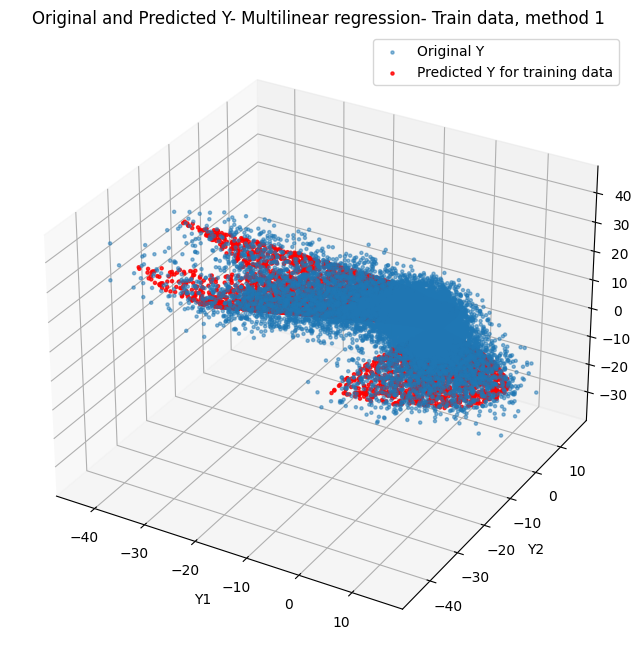

<Figure size 1000x800 with 0 Axes>

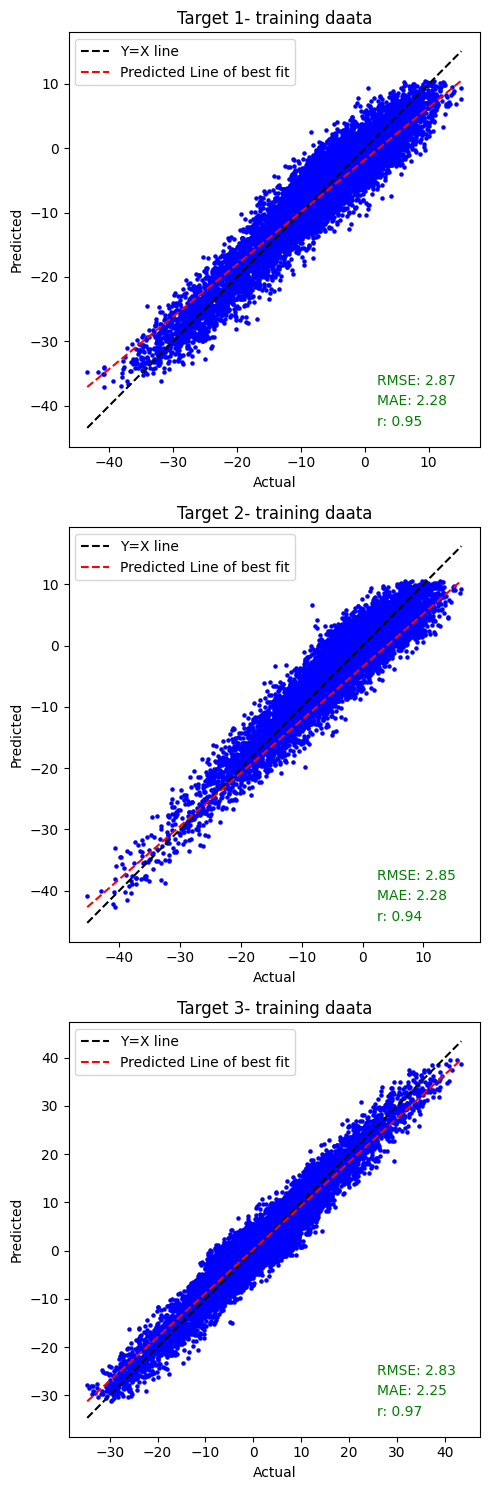

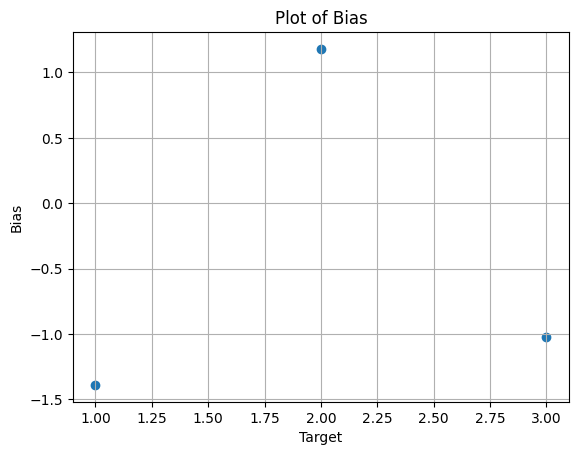

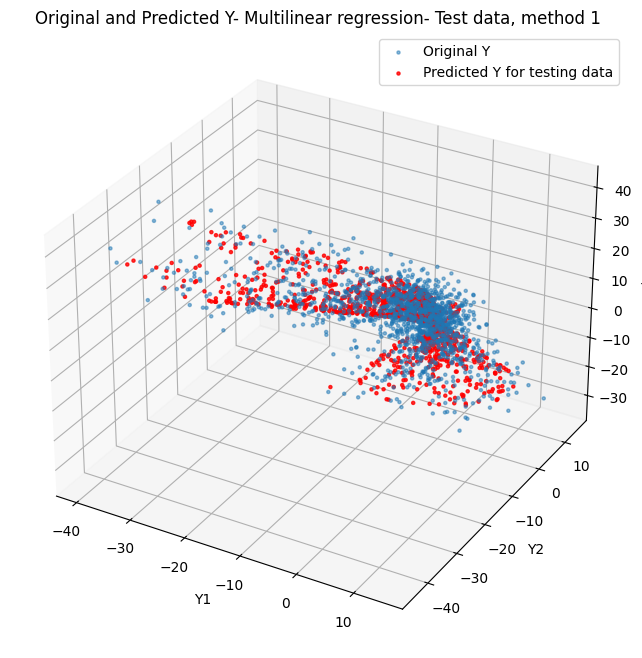

<Figure size 1000x800 with 0 Axes>

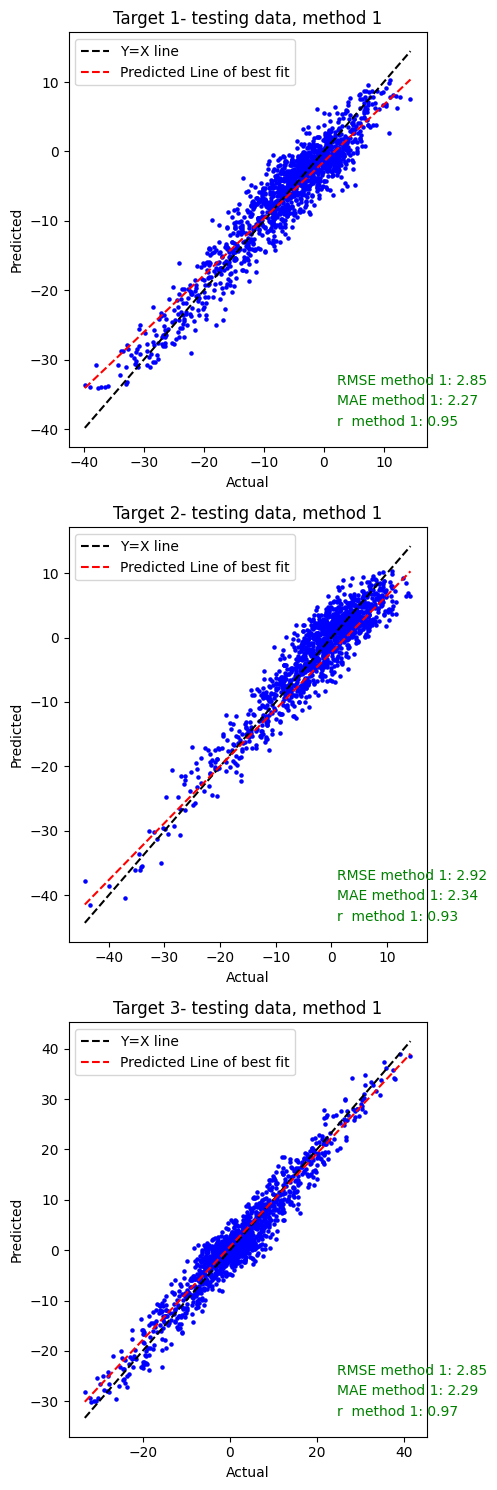

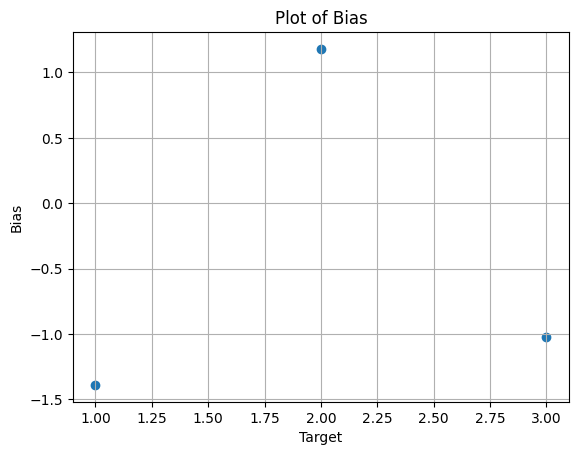

In [22]:
# @title Visualization- Least squares loss function
# Plot the original and predicted points in 3D- train data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y_train[:, 0], Y_train[:, 1], Y_train[:, 2], label='Original Y', s=5,alpha=0.5)
ax.scatter(predicted_Y_train[:, 0], predicted_Y_train[:, 1], predicted_Y_train[:, 2],color='r', label='Predicted Y for training data', s=5,alpha=0.8)
#ax.text2D(0.85, 0.85, "RMSE: {:.2f}".format(rmse_total), transform=ax.transAxes, color='green', fontsize=10)

ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
ax.set_zlabel('Y3')
ax.set_title('Original and Predicted Y- Multilinear regression- Train data, method 1')
ax.legend()
plt.show()

# Plot actual vs predicted targets
fig = plt.figure(figsize=(10, 8))



# Create subplots for each target variable
fig, axs = plt.subplots(3, 1, figsize=(5, 15))  # Adjust the number of subplots and figsize as needed

for i in range(3):
    # Scatter plot for actual vs predicted values
    Y=Y_train
    predicted_Y=predicted_Y_train
    axs[i].scatter(Y[:, i], predicted_Y[:, i], color='blue', s=5)

    # Add lines
    axs[i].plot([Y[:, i].min(), Y[:, i].max()], [Y[:, i].min(), Y[:, i].max()], color='black', linestyle='--',label='Y=X line')
    axs[i].plot([Y[:, i].min(), Y[:, i].max()], [predicted_Y[:, i].min(), predicted_Y[:, i].max()], color='red', linestyle='--',label='Predicted Line of best fit')

    # Set labels and title
    axs[i].set_xlabel('Actual')
    axs[i].set_ylabel('Predicted')
    axs[i].set_title('Target {}- training daata'.format(i+1))

    # Add errors as text
    axs[i].text(0.75, 0.15, "RMSE: {:.2f}".format(rmse_train[i]), transform=axs[i].transAxes, color='green', fontsize=10)
    axs[i].text(0.75, 0.10, "MAE: {:.2f}".format(mae_train[i]), transform=axs[i].transAxes, color='green', fontsize=10)
    axs[i].text(0.75, 0.05, "r: {:.2f}".format(pearson_coeffs_train[i]), transform=axs[i].transAxes, color='green', fontsize=10)
    axs[i].legend()


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Create indices for the bias values
indices = np.arange(len(bias))

# Plot the bias values
plt.scatter(indices+1, bias)
plt.xlabel('Target')
plt.ylabel('Bias')
plt.title('Plot of Bias')
plt.grid(True)
plt.show()


# Plot the original and predicted points for test data in 3D-
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y_test[:, 0], Y_test[:, 1], Y_test[:, 2], label='Original Y', s=5,alpha=0.5)
ax.scatter(predicted_Y_test[:, 0], predicted_Y_test[:, 1], predicted_Y_test[:, 2],color='r', label='Predicted Y for testing data', s=5,alpha=0.8)
#ax.text2D(0.85, 0.85, "RMSE: {:.2f}".format(rmse_total), transform=ax.transAxes, color='green', fontsize=10)

ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
ax.set_zlabel('Y3')
ax.set_title('Original and Predicted Y- Multilinear regression- Test data, method 1')
ax.legend()
plt.show()

# Plot actual vs predicted targets
fig = plt.figure(figsize=(10, 8))



# Create subplots for each target variable
fig, axs = plt.subplots(3, 1, figsize=(5, 15))  # Adjust the number of subplots and figsize as needed

for i in range(3):
    # Scatter plot for actual vs predicted values
    Y=Y_test
    predicted_Y=predicted_Y_test
    axs[i].scatter(Y[:, i], predicted_Y[:, i], color='blue', s=5)

    # Add lines
    axs[i].plot([Y[:, i].min(), Y[:, i].max()], [Y[:, i].min(), Y[:, i].max()], color='black', linestyle='--',label='Y=X line')
    axs[i].plot([Y[:, i].min(), Y[:, i].max()], [predicted_Y[:, i].min(), predicted_Y[:, i].max()], color='red', linestyle='--',label='Predicted Line of best fit')

    # Set labels and title
    axs[i].set_xlabel('Actual')
    axs[i].set_ylabel('Predicted')
    axs[i].set_title('Target {}- testing data, method 1'.format(i+1))

    # Add errors as text
    axs[i].text(0.75, 0.15, "RMSE method 1: {:.2f}".format(rmse_test[i]), transform=axs[i].transAxes, color='green', fontsize=10)
    axs[i].text(0.75, 0.10, "MAE method 1: {:.2f}".format(mae_test[i]), transform=axs[i].transAxes, color='green', fontsize=10)
    axs[i].text(0.75, 0.05, "r  method 1: {:.2f}".format(pearson_coeffs_test[i]), transform=axs[i].transAxes, color='green', fontsize=10)
    axs[i].legend()


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Create indices for the bias values
indices = np.arange(len(bias))

# Plot the bias values
plt.scatter(indices+1, bias)
plt.xlabel('Target')
plt.ylabel('Bias')
plt.title('Plot of Bias')
plt.grid(True)
plt.show()







In [23]:
# @title Training and testing with Mean absolute loss function
import numpy as np
import matplotlib.pyplot as plt

# Define Mean Absolute Error (MAE) loss function
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Implement linear regression with MAE loss using gradient descent with early stopping
def linear_regression_mae(X, Y, X_test, Y_test, learning_rate=0.01, epochs=1000000, tol=1e-6):
    num_targets = Y.shape[1]
    weights = []
    mae_values_all = []
    mae_test_values_all = []
    epochs_to_stop = []

    for i in range(num_targets):
        y = Y[:, i]
        # Initialize weights randomly
        np.random.seed(0)
        w = np.random.randn(X.shape[1])

        # Initialize previous MAE
        prev_mae = float('inf')

        # Initialize list to store MAE values
        mae_values = []
        mae_test_values = []

        # Perform gradient descent
        for epoch in range(epochs):
            # Calculate predictions
            y_pred = np.dot(X, w)

            # Calculate gradient of MAE loss
            gradient = np.dot(np.sign(y_pred - y), X) / len(y)

            # Update weights using gradient descent
            w -= learning_rate * gradient

            # Calculate MAE for monitoring
            mae = mean_absolute_error(y, y_pred)
            mae_values.append(mae)

            # Check for improvement in MAE
            if prev_mae - mae < tol:
                print(f"Target {i+1}: Early stopping at Epoch {epoch+1}, Final MAE for train data: {mae}")
                epochs_to_stop.append(epoch+1)
                break

            # Update previous MAE
            prev_mae = mae

        # Calculate MAE on test data
        y_test_pred = np.dot(X_test, w)
        mae_test = mean_absolute_error(Y_test[:, i], y_test_pred)
        mae_test_values.append(mae_test)

        weights.append(w)
        mae_values_all.append(mae_values)
        mae_test_values_all.append(mae_test_values)

    return weights, mae_values_all, mae_test_values_all, epochs_to_stop

# Train linear regression models with MAE loss for all target variables
weights_mae, mae_values_all, mae_test_values_all, epochs_to_stop = linear_regression_mae(X_aug_train, Y_train, X_aug_test, Y_test)


Target 1: Early stopping at Epoch 12481, Final MAE for train data: 2.2846717806260504
Target 2: Early stopping at Epoch 9578, Final MAE for train data: 2.283272709248371
Target 3: Early stopping at Epoch 12750, Final MAE for train data: 2.2534196795037924


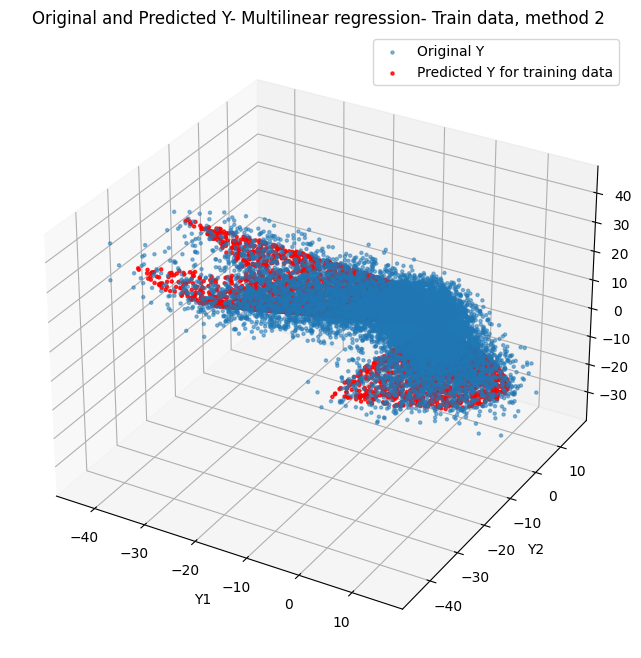

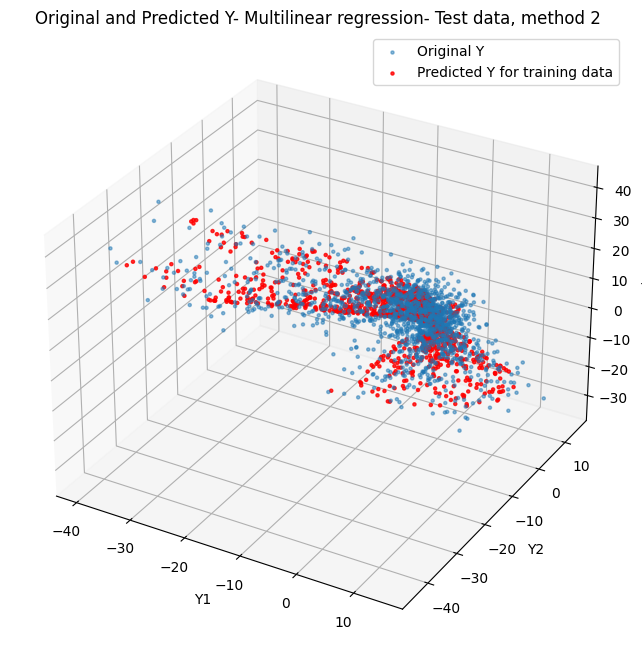

<Figure size 1000x800 with 0 Axes>

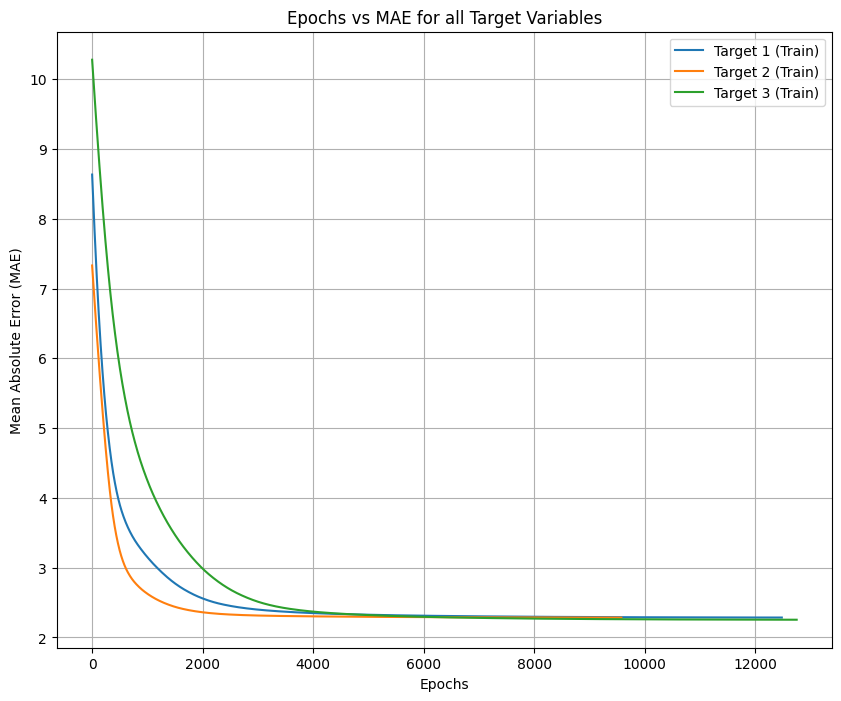

Target 1: Final MAE for test data = 2.275089352638929
Target 2: Final MAE for test data = 2.34793560797697
Target 3: Final MAE for test data = 2.2925241081745455


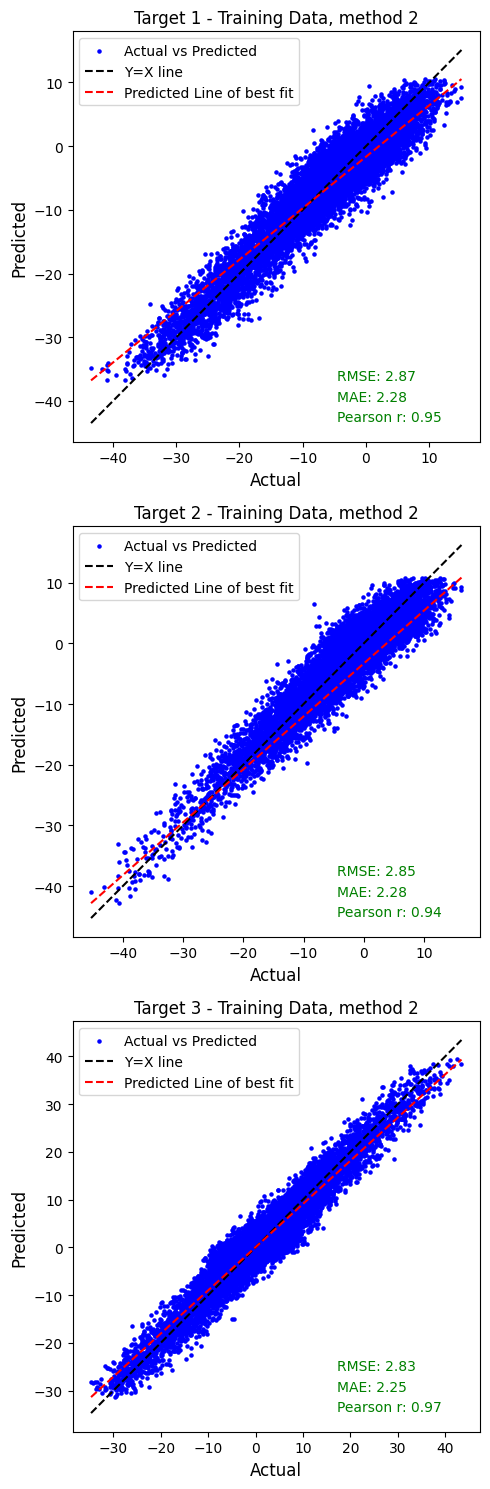

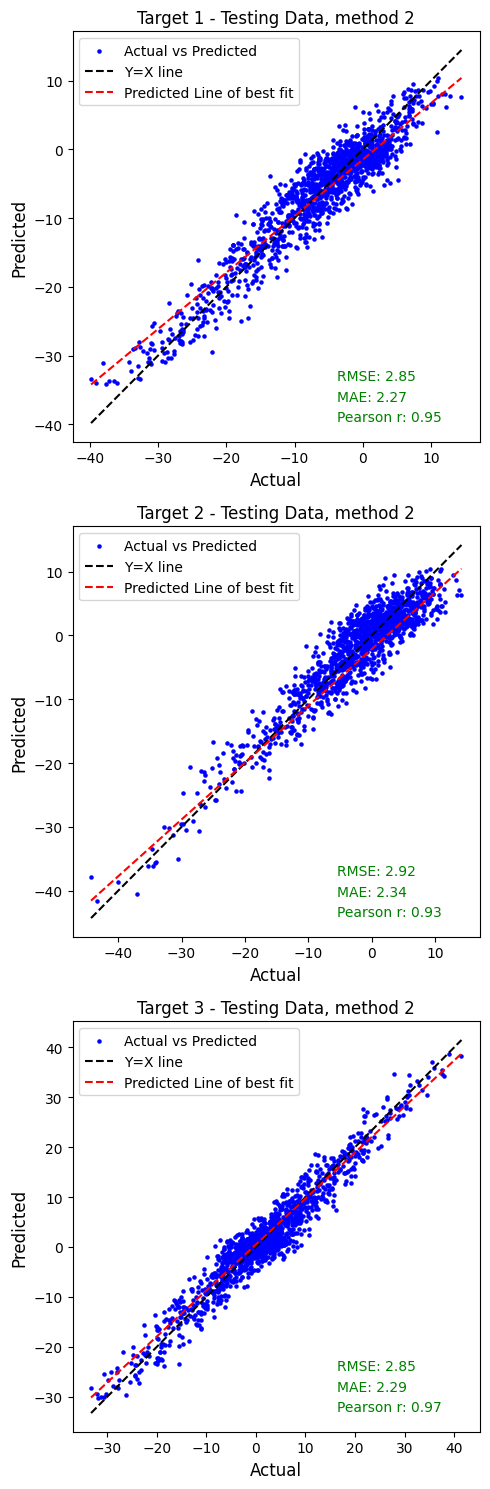

In [24]:
# @title Visualization for MAE loss function
# Predict target values using the trained weights

weights_mae_array = np.array(weights_mae)
predicted_Y_train_mae = np.dot(X_aug_train, weights_mae_array.T)
predicted_Y_test_mae = np.dot(X_aug_test, weights_mae_array.T)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y_train[:, 0], Y_train[:, 1], Y_train[:, 2], label='Original Y', s=5,alpha=0.5)
ax.scatter(predicted_Y_train_mae[:, 0], predicted_Y_train_mae[:, 1], predicted_Y_train_mae[:, 2],color='r', label='Predicted Y for training data', s=5,alpha=0.8)
#ax.text2D(0.85, 0.85, "RMSE: {:.2f}".format(rmse_total), transform=ax.transAxes, color='green', fontsize=10)

ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
ax.set_zlabel('Y3')
ax.set_title('Original and Predicted Y- Multilinear regression- Train data, method 2')
ax.legend()
plt.show()


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y_test[:, 0], Y_test[:, 1], Y_test[:, 2], label='Original Y', s=5,alpha=0.5)
ax.scatter(predicted_Y_test_mae[:, 0], predicted_Y_test_mae[:, 1], predicted_Y_test_mae[:, 2],color='r', label='Predicted Y for training data', s=5,alpha=0.8)
#ax.text2D(0.85, 0.85, "RMSE: {:.2f}".format(rmse_total), transform=ax.transAxes, color='green', fontsize=10)

ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
ax.set_zlabel('Y3')
ax.set_title('Original and Predicted Y- Multilinear regression- Test data, method 2')
ax.legend()
plt.show()


# Plot actual vs predicted targets
fig = plt.figure(figsize=(10, 8))
# Plot MAE vs epochs for all target variables
plt.figure(figsize=(10, 8))
for i, mae_values in enumerate(mae_values_all):
    plt.plot(range(1, len(mae_values) + 1), mae_values, label=f'Target {i+1} (Train)')


plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Epochs vs MAE for all Target Variables')
plt.grid(True)
plt.legend()
plt.show()

# Print final MAE and epoch for each target variable
for i, stop_epoch in enumerate(epochs_to_stop):
    print(f"Target {i+1}: Final MAE for test data = {mae_test_values_all[i][-1]}")

# Plot actual vs predicted targets for training data
fig, axs = plt.subplots(3, 1, figsize=(5, 15))  # Adjust the number of subplots and figsize as needed

# Create subplots for each target variable
for i in range(3):
    plt.subplot(3, 1, i+1)

    # Scatter plot for actual vs predicted values
    plt.scatter(Y_train[:, i], predicted_Y_train_mae[:, i], color='blue', label='Actual vs Predicted', s=5)
    # Add lines
    y_min = min(Y_train[:, i].min(), predicted_Y_train_mae[:, i].min())
    y_max = max(Y_train[:, i].max(), predicted_Y_train_mae[:, i].max())
    plt.plot([y_min, y_max], [y_min, y_max], color='black', linestyle='--',label='Y=X line')
    plt.plot([y_min, y_max], [predicted_Y_train_mae[:, i].min(), predicted_Y_train_mae[:, i].max()], color='red', linestyle='--',label='Predicted Line of best fit')


    plt.legend()


    # Set labels and title
    axs[i].set_xlabel('Actual', fontsize=12, color='black')  # Adjust fontsize and color
    axs[i].set_ylabel('Predicted', fontsize=12, color='black')  # Adjust fontsize and color
    axs[i].set_title(f'Target {i+1} - Training Data, method 2')


    # Add errors as text
    axs[i].text(0.65, 0.15, f"RMSE: {rmse_train[i]:.2f}", transform=axs[i].transAxes, color='green', fontsize=10)
    axs[i].text(0.65, 0.10, f"MAE: {mae_train[i]:.2f}", transform=axs[i].transAxes, color='green', fontsize=10)
    axs[i].text(0.65, 0.05, f"Pearson r: {pearson_coeffs_train[i]:.2f}", transform=axs[i].transAxes, color='green', fontsize=10)

    # Add legend
    axs[i].legend()


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Plot actual vs predicted targets for testing data
fig, axs = plt.subplots(3, 1, figsize=(5, 15))  # Adjust the number of subplots and figsize as needed

# Create subplots for each target variable
for i in range(3):
    plt.subplot(3, 1, i+1)

    # Scatter plot for actual vs predicted values
    plt.scatter(Y_test[:, i], predicted_Y_test_mae[:, i], color='blue', label='Actual vs Predicted', s=5)
    # Add lines
    y_min = min(Y_test[:, i].min(), predicted_Y_test_mae[:, i].min())
    y_max = max(Y_test[:, i].max(), predicted_Y_test_mae[:, i].max())
    plt.plot([y_min, y_max], [y_min, y_max], color='black', linestyle='--',label='Y=X line')
    plt.plot([y_min, y_max], [predicted_Y_test_mae[:, i].min(), predicted_Y_test_mae[:, i].max()], color='red', linestyle='--',label='Predicted Line of best fit')


    plt.legend()


    # Set labels and title
    axs[i].set_xlabel('Actual', fontsize=12, color='black')  # Adjust fontsize and color
    axs[i].set_ylabel('Predicted', fontsize=12, color='black')  # Adjust fontsize and color
    axs[i].set_title(f'Target {i+1} - Testing Data, method 2')


    # Add errors as text
    axs[i].text(0.65, 0.15, f"RMSE: {rmse_test[i]:.2f}", transform=axs[i].transAxes, color='green', fontsize=10)
    axs[i].text(0.65, 0.10, f"MAE: {mae_test[i]:.2f}", transform=axs[i].transAxes, color='green', fontsize=10)
    axs[i].text(0.65, 0.05, f"Pearson r: {pearson_coeffs_test[i]:.2f}", transform=axs[i].transAxes, color='green', fontsize=10)

    # Add legend
    axs[i].legend()


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



In [25]:
# @title Error analysis results- MAE loss function
# Define Root Mean Square Error (RMSE) loss function
def root_mean_square_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Calculate RMSE for each target variable
rmse_train = [root_mean_square_error(Y_train[:, i], np.dot(X_aug_train, weights_mae[i])) for i in range(len(weights_mae))]
rmse_test = [root_mean_square_error(Y_test[:, i], np.dot(X_aug_test, weights_mae[i])) for i in range(len(weights_mae))]

# Calculate MAE for each target variable
mae_train = [mean_absolute_error(Y_train[:, i], np.dot(X_aug_train, weights_mae[i])) for i in range(len(weights_mae))]
mae_test = [mean_absolute_error(Y_test[:, i], np.dot(X_aug_test, weights_mae[i])) for i in range(len(weights_mae))]

# Compute Pearson's correlation coefficients for each target variable
def pearson_correlation_coefficient(y_true, y_pred):
    std_actual = np.std(y_true)
    std_predicted = np.std(y_pred)
    covariance = np.mean((y_true - np.mean(y_true)) * (y_pred - np.mean(y_pred)))
    return covariance / (std_actual * std_predicted)

pearson_coeffs_train = [pearson_correlation_coefficient(Y_train[:, i], np.dot(X_aug_train, weights_mae[i])) for i in range(len(weights_mae))]
pearson_coeffs_test = [pearson_correlation_coefficient(Y_test[:, i], np.dot(X_aug_test, weights_mae[i])) for i in range(len(weights_mae))]

from tabulate import tabulate

# Calculate the mean of RMSE, MAE, and Pearson's coefficients for all target variables
mean_rmse_train = np.mean(rmse_train)
mean_rmse_test = np.mean(rmse_test)
mean_mae_train = np.mean(mae_train)
mean_mae_test = np.mean(mae_test)
mean_pearson_coeffs_train = np.mean(pearson_coeffs_train)
mean_pearson_coeffs_test = np.mean(pearson_coeffs_test)

# Organize data into a table
data = []
for i in range(len(weights_mae)):
    data.append([f"Target {i+1}", rmse_train[i], rmse_test[i], mae_train[i], mae_test[i], pearson_coeffs_train[i], pearson_coeffs_test[i]])

# Calculate mean values for all metrics
mean_values = ["Mean", mean_rmse_train, mean_rmse_test, mean_mae_train, mean_mae_test, mean_pearson_coeffs_train, mean_pearson_coeffs_test]

# Append mean values to the data
data.append(mean_values)

# Define headers for the table
headers = ["Target", "RMSE (Train)", "RMSE (Test)", "MAE (Train)", "MAE (Test)", "Pearson's coefficient (Train)", "Pearson's coefficient (Test)"]

# Generate the table
table = tabulate(data, headers=headers, tablefmt="grid")

# Print the table
print('Error analysis/Metric evaluation for method 2')
print(table)

Error analysis/Metric evaluation for method 2
+----------+----------------+---------------+---------------+--------------+---------------------------------+--------------------------------+
| Target   |   RMSE (Train) |   RMSE (Test) |   MAE (Train) |   MAE (Test) |   Pearson's coefficient (Train) |   Pearson's coefficient (Test) |
+==========+================+===============+===============+==============+=================================+================================+
| Target 1 |        2.8717  |       2.8466  |       2.28467 |      2.27509 |                        0.948464 |                       0.947881 |
+----------+----------------+---------------+---------------+--------------+---------------------------------+--------------------------------+
| Target 2 |        2.8583  |       2.92845 |       2.28327 |      2.34794 |                        0.937159 |                       0.933668 |
+----------+----------------+---------------+---------------+--------------+--------------

In [30]:
# @title Conclusions
print('1. Errors on testing data were more compared to training data. Pearson coefficient for testing data was less compared to training data')
print('2. Regularization gave slightly better results')
print('3. Method 2 converged after around 12000 iterations')
print('4. Errors for method 2 (Absolute mean loss function) were slightly more compared to method 1 (Least squares loss function)')
print('5. Pearson coefficient for method 2 (Absolute mean loss function) were slightly less compared to method 1 (Least squares loss function)')

1. Errors on testing data were more compared to training data. Pearson coefficient for testing data was less compared to training data
2. Regularization gave slightly better results
3. Method 2 converged after around 12000 iterations
4. Errors for method 2 (Absolute mean loss function) were slightly more compared to method 1 (Least squares loss function)
5. Pearson coefficient for method 2 (Absolute mean loss function) were slightly less compared to method 1 (Least squares loss function)


In [ ]:
# @title Q2


In [14]:
# @title Methodology
# Print methodology
print("Methodology")
print("""
Initialization:
The class is initialized with a parameter degree, which determines the degree of the polynomial features to be used in the regression.

Polynomial Feature Generation:
The _polynomial_features method generates polynomial features from the input data. For each data point (x1, x2), it computes polynomial terms up to the specified degree.
For example, if degree=2, it generates features like (x1^2, x1*x2, x2^2).

Model Fitting:
The fit method takes the input features X and target variables y.
It first generates polynomial features using _polynomial_features.
Then, it computes the pseudoinverse of the polynomial features matrix using np.linalg.pinv.
Finally, it solves for the coefficients using matrix multiplication: coefficients = pseudoinv(X_poly) * y.

Prediction:
The predict method takes the input features X.
It generates polynomial features for the test data using _polynomial_features.
Then, it computes the predicted target variables using matrix multiplication: y_pred = X_poly * coefficients.""")

print(""" Model Evaluation:
The trained model is evaluated using various metrics such as Mean Absolute Error (MAE) and Pearson correlation coefficient. These metrics provide insights into the accuracy and performance of the model in predicting the particle's position.""")
print("   where W is the weight matrix, X is the augmented feature matrix, and Y is the target matrix.")
print("   - Root Mean Square Error (RMSE):")
print("     RMSE = sqrt(mean((Y - predicted_Y)^2))")

print("   - Mean Absolute Error (MAE):")
print("     MAE = mean(abs(Y - predicted_Y))")

print("   - Pearson correlation coefficient:")
print("     r = cov(Y, predicted_Y) / (std(Y) * std(predicted_Y))")

Methodology

Initialization:
The class is initialized with a parameter degree, which determines the degree of the polynomial features to be used in the regression.

Polynomial Feature Generation:
The _polynomial_features method generates polynomial features from the input data. For each data point (x1, x2), it computes polynomial terms up to the specified degree.
For example, if degree=2, it generates features like (x1^2, x1*x2, x2^2).

Model Fitting:
The fit method takes the input features X and target variables y.
It first generates polynomial features using _polynomial_features.
Then, it computes the pseudoinverse of the polynomial features matrix using np.linalg.pinv.
Finally, it solves for the coefficients using matrix multiplication: coefficients = pseudoinv(X_poly) * y.

Prediction:
The predict method takes the input features X.
It generates polynomial features for the test data using _polynomial_features.
Then, it computes the predicted target variables using matrix multiplicat

In [ ]:
# @title Import libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly


In [ ]:
# @title Define Polynomial Kernal regression for one degree
class PolynomialKernelRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.coefficients = None

    def _polynomial_features(self, X):
        # Generate polynomial features from basis vectors x1 and x2
        X_poly = []
        for d in range(1, self.degree + 1):
            for i in range(d + 1):
                X_poly.append((X[:, 0] ** (d - i)) * (X[:, 1] ** i))
        return np.column_stack(X_poly)

    def fit(self, X, y):
        # Compute polynomial features
        X_poly = self._polynomial_features(X)

        # Compute pseudoinverse of the polynomial features
        X_pseudoinv = np.linalg.pinv(X_poly)

        # Solve for coefficients using matrix operations
        self.coefficients = np.dot(X_pseudoinv, y)

    def predict(self, X):
        # Compute polynomial features for test data
        X_poly = self._polynomial_features(X)

        # Predict target variables
        y_pred = np.dot(X_poly, self.coefficients)
        return y_pred

# Instantiate the PolynomialKernelRegression model
degree = 20  # Choose the degree of the polynomial features
poly_kernel_reg = PolynomialKernelRegression(degree=degree)

# Fit the model to the training data
poly_kernel_reg.fit(X_train, Y_train)

# Predict the target values for the training data
Y_pred_train = poly_kernel_reg.predict(X_train)
Y_pred_test = poly_kernel_reg.predict(X_test)

# Compute RMSE for each target variable


# RMSE for each target
rmse = np.sqrt(np.mean((Y_train - Y_pred_train)**2, axis=0))
print('RMSE for each target=',rmse)
# MAE for each target
mae = np.mean(np.abs(Y_train - Y_pred_train), axis=0)
print('MAE for each target=',mae)


# Compute standard deviations
std_actual = np.std(Y_train, axis=0)
std_predicted = np.std(Y_pred_train, axis=0)

# Compute Pearson correlation coefficient for each target variable
pearson_coeffs = np.zeros(np.shape(Y_train)[1])

for i in range(np.shape(Y_train)[1]):
    # Compute covariance
    covariance = np.sum((Y_train[:, i] - np.mean(Y_train[:, i])) * (Y_pred_train[:, i] - np.mean(Y_pred_train[:, i])))/(len(Y_train) - 1)

    # Compute Pearson correlation coefficient
    pearson_coeffs[i] = covariance / (std_actual[i] * std_predicted[i])
    print("Pearson coef for target", i+1, ":", pearson_coeffs[i])


# Plot the original and predicted points in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y_train[:, 0], Y_train[:, 1], Y_train[:, 2], label='Original Y (Training)', s=5, alpha=0.5)
ax.scatter(Y_pred_train[:, 0], Y_pred_train[:, 1], Y_pred_train[:, 2], color='r', label='Predicted Y (Training)', s=5, alpha=0.8)
ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
ax.set_zlabel('Y3')
ax.set_title('Original and Predicted Y - Training Data')
ax.legend()
plt.show()
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for i in range(3):
    Y=Y_train
    predicted_Y=Y_pred_train
    # Scatter plot for actual vs. predicted values
    axs[i].scatter(Y_train[:, i], Y_pred_train[:, i], color='blue', label='Actual vs. Predicted', alpha=0.7)

      # Add lines
    # Add lines
    axs[i].plot([Y[:, i].min(), Y[:, i].max()], [Y[:, i].min(), Y[:, i].max()], color='black', linestyle='--',label='Y=X line')
    axs[i].plot([Y[:, i].min(), Y[:, i].max()], [predicted_Y[:, i].min(), predicted_Y[:, i].max()], color='red', linestyle='--',label='Predicted Line of best fit')

    # Set labels and title
    axs[i].set_xlabel('Actual')
    axs[i].set_ylabel('Predicted')
    axs[i].set_title('Target {}'.format(i+1))

    # Add errors as text
    axs[i].text(0.75, 0.15, "RMSE: {:.2f}".format(rmse[i]), transform=axs[i].transAxes, color='green', fontsize=10)
    axs[i].text(0.75, 0.10, "MAE: {:.2f}".format(mae[i]), transform=axs[i].transAxes, color='green', fontsize=10)
    axs[i].text(0.75, 0.05, "r: {:.2f}".format(pearson_coeffs[i]), transform=axs[i].transAxes, color='green', fontsize=10)
    axs[i].text(0.75,0.01,"degree: {:.2f}".format(degree), transform=axs[i].transAxes, color='green', fontsize=10)
    axs[i].legend()
plt.tight_layout()
plt.show()

In [ ]:
# @title Load and split data
# Load the data
data = np.loadtxt("/content/drive/MyDrive/PRNN/Assignment_1/regression_data_multiGen_group_5_train.txt", skiprows=1, dtype='float')
d=2;
X_original=data[:,0:d]
Y_original=data[:,d:d+3]
# Define proportions for train, validation, and test sets
train_ratio = 0.5
val_ratio = 0
test_ratio = 1-train_ratio-val_ratio

# Calculate the sizes of each set
num_samples = len(data)
num_train = int(train_ratio * num_samples)
num_val = int(val_ratio * num_samples)
num_test = num_samples - num_train - num_val

# Split the data into train, validation, and test sets
X_train, Y_train = data[:num_train, :-3], data[:num_train, -3:]
X_val, Y_val = data[num_train:num_train+num_val, :-3], data[num_train:num_train+num_val, -3:]
X_test, Y_test = data[-num_test:, :-3], data[-num_test:, -3:]


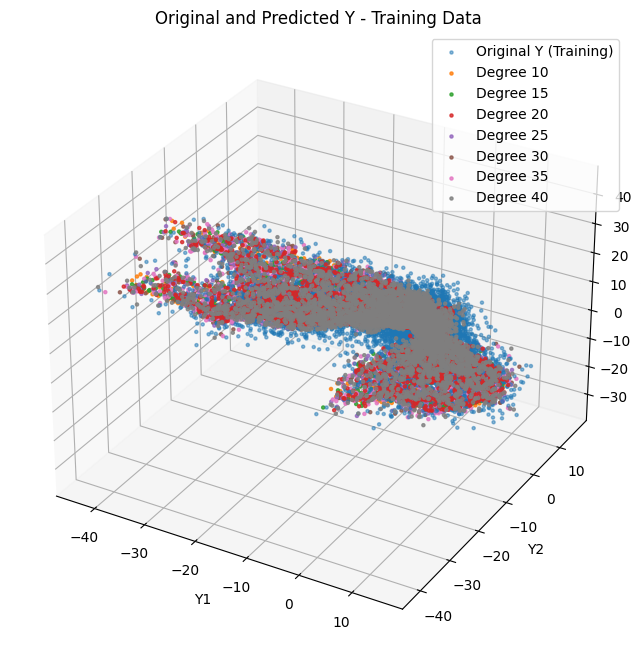

Degree	RMSE (Y1)	RMSE (Y2)	RMSE (Y3)	MAE (Y1)	MAE (Y2)	MAE (Y3)	Pearson (Y1)	Pearson (Y2)	Pearson (Y3)
10	2.92		2.86		2.85		2.33		2.28		2.27		0.95		0.94		0.97
15	2.88		2.84		2.83		2.30		2.26		2.26		0.95		0.94		0.97
20	2.85		2.81		2.80		2.27		2.24		2.23		0.95		0.94		0.97
25	2.82		2.78		2.78		2.25		2.22		2.21		0.95		0.94		0.97
30	2.78		2.75		2.74		2.22		2.19		2.18		0.95		0.94		0.97
35	2.74		2.71		2.70		2.19		2.16		2.15		0.95		0.94		0.97
40	2.72		2.69		2.68		2.16		2.14		2.13		0.95		0.94		0.97


In [2]:
# @title Polynomial regression for various degrees
import numpy as np
import matplotlib.pyplot as plt

class PolynomialKernelRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.coefficients = None

    def _polynomial_features(self, X):
        # Generate polynomial features from basis vectors x1 and x2
        X_poly = []
        for d in range(1, self.degree + 1):
            for i in range(d + 1):
                X_poly.append((X[:, 0] ** (d - i)) * (X[:, 1] ** i))
        return np.column_stack(X_poly)

    def fit(self, X, y):
        # Compute polynomial features
        X_poly = self._polynomial_features(X)

        # Compute pseudoinverse of the polynomial features
        X_pseudoinv = np.linalg.pinv(X_poly)

        # Solve for coefficients using matrix operations
        self.coefficients = np.dot(X_pseudoinv, y)

    def predict(self, X):
        # Compute polynomial features for test data
        X_poly = self._polynomial_features(X)

        # Predict target variables
        y_pred = np.dot(X_poly, self.coefficients)
        return y_pred



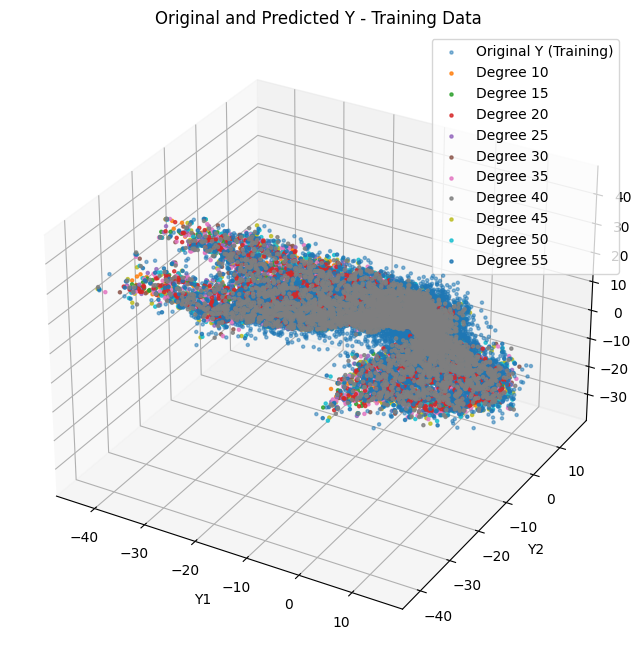

Degree	RMSE (Y1)	RMSE (Y2)	RMSE (Y3)	MAE (Y1)	MAE (Y2)	MAE (Y3)	Pearson (Y1)	Pearson (Y2)	Pearson (Y3)
10	2.92		2.86		2.85		2.33		2.28		2.27		0.95		0.94		0.97
15	2.88		2.84		2.83		2.30		2.26		2.26		0.95		0.94		0.97
20	2.85		2.81		2.80		2.27		2.24		2.23		0.95		0.94		0.97
25	2.82		2.78		2.78		2.25		2.22		2.21		0.95		0.94		0.97
30	2.78		2.75		2.74		2.22		2.19		2.18		0.95		0.94		0.97
35	2.74		2.71		2.70		2.19		2.16		2.15		0.95		0.94		0.97
40	2.72		2.69		2.68		2.16		2.14		2.13		0.95		0.94		0.97
45	2.70		2.67		2.66		2.14		2.12		2.11		0.95		0.94		0.97
50	2.69		2.66		2.66		2.13		2.11		2.11		0.96		0.95		0.97
55	2.69		2.66		2.65		2.13		2.10		2.10		0.96		0.95		0.97


In [7]:
# @title Train and test- Enter degrees here
# Degrees to compare
degrees = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]  # Choose the degrees of the polynomial features

# Lists to store errors
rmse_list = []
mae_list = []
pearson_list = []

# Plot the original and predicted points in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y_train[:, 0], Y_train[:, 1], Y_train[:, 2], label='Original Y (Training)', s=5, alpha=0.5)

for degree in degrees:
    # Instantiate the PolynomialKernelRegression model
    poly_kernel_reg = PolynomialKernelRegression(degree=degree)

    # Fit the model to the training data
    poly_kernel_reg.fit(X_train, Y_train)

    # Predict the target values for the training data
    Y_pred_train = poly_kernel_reg.predict(X_train)

    # Compute RMSE for each target variable
    rmse = np.sqrt(np.mean((Y_train - Y_pred_train)**2, axis=0))
    rmse_list.append(rmse)

    # Compute MAE for each target variable
    mae = np.mean(np.abs(Y_train - Y_pred_train), axis=0)
    mae_list.append(mae)

    # Compute Pearson correlation coefficient for each target variable
    std_actual = np.std(Y_train, axis=0)
    std_predicted = np.std(Y_pred_train, axis=0)
    pearson_coeffs = np.zeros(np.shape(Y_train)[1])

    for i in range(np.shape(Y_train)[1]):
        covariance = np.sum((Y_train[:, i] - np.mean(Y_train[:, i])) * (Y_pred_train[:, i] - np.mean(Y_pred_train[:, i]))) / (len(Y_train) - 1)
        pearson_coeffs[i] = covariance / (std_actual[i] * std_predicted[i])

    pearson_list.append(pearson_coeffs)

    # Scatter plot
    ax.scatter(Y_pred_train[:, 0], Y_pred_train[:, 1], Y_pred_train[:, 2], label=f'Degree {degree}', s=5, alpha=0.8)

ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
ax.set_zlabel('Y3')
ax.set_title('Original and Predicted Y - Training Data')
ax.legend()
plt.show()

# Tabular results
print("Degree\tRMSE (Y1)\tRMSE (Y2)\tRMSE (Y3)\tMAE (Y1)\tMAE (Y2)\tMAE (Y3)\tPearson (Y1)\tPearson (Y2)\tPearson (Y3)")
for i, degree in enumerate(degrees):
    print(f"{degree}\t{rmse_list[i][0]:.2f}\t\t{rmse_list[i][1]:.2f}\t\t{rmse_list[i][2]:.2f}\t\t{mae_list[i][0]:.2f}\t\t{mae_list[i][1]:.2f}\t\t{mae_list[i][2]:.2f}\t\t{pearson_list[i][0]:.2f}\t\t{pearson_list[i][1]:.2f}\t\t{pearson_list[i][2]:.2f}")


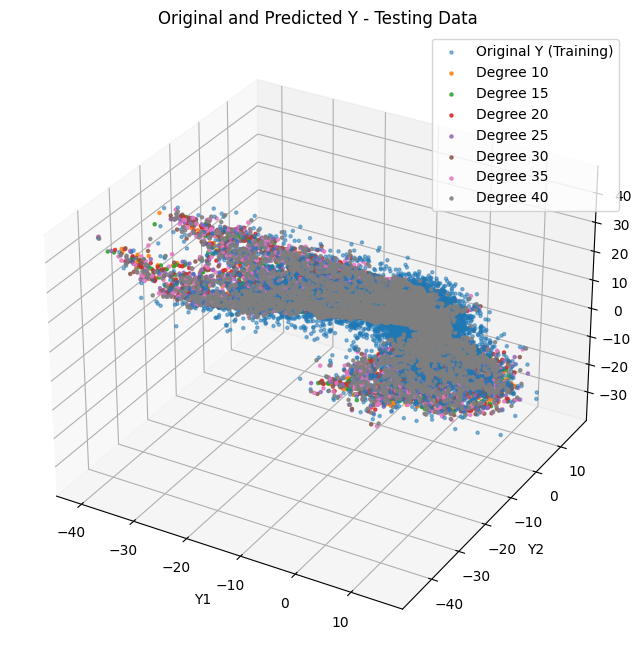

Degree	RMSE (Y1)	RMSE (Y2)	RMSE (Y3)	MAE (Y1)	MAE (Y2)	MAE (Y3)	Pearson (Y1)	Pearson (Y2)	Pearson (Y3)
10	2.92		2.86		2.85		2.33		2.28		2.27		0.95		0.94		0.97
15	2.88		2.84		2.83		2.30		2.26		2.26		0.95		0.94		0.97
20	2.85		2.81		2.80		2.27		2.24		2.23		0.95		0.94		0.97
25	2.82		2.78		2.78		2.25		2.22		2.21		0.95		0.94		0.97
30	2.78		2.75		2.74		2.22		2.19		2.18		0.95		0.94		0.97
35	2.74		2.71		2.70		2.19		2.16		2.15		0.95		0.94		0.97
40	2.72		2.69		2.68		2.16		2.14		2.13		0.95		0.94		0.97


In [3]:
# @title Visualization
# Plot the original and predicted points in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y_test[:, 0], Y_test[:, 1], Y_test[:, 2], label='Original Y (Training)', s=5, alpha=0.5)

for degree in degrees:
    # Instantiate the PolynomialKernelRegression model
    poly_kernel_reg = PolynomialKernelRegression(degree=degree)

    # Fit the model to the training data
    poly_kernel_reg.fit(X_test, Y_test)

    # Predict the target values for the training data
    Y_pred_test = poly_kernel_reg.predict(X_test)

    # Compute RMSE for each target variable
    rmse = np.sqrt(np.mean((Y_test - Y_pred_test)**2, axis=0))
    rmse_list.append(rmse)

    # Compute MAE for each target variable
    mae = np.mean(np.abs(Y_test - Y_pred_test), axis=0)
    mae_list.append(mae)

    # Compute Pearson correlation coefficient for each target variable
    std_actual = np.std(Y_test, axis=0)
    std_predicted = np.std(Y_pred_test, axis=0)
    pearson_coeffs = np.zeros(np.shape(Y_test)[1])

    for i in range(np.shape(Y_test)[1]):
        covariance = np.sum((Y_test[:, i] - np.mean(Y_test[:, i])) * (Y_pred_test[:, i] - np.mean(Y_pred_test[:, i]))) / (len(Y_train) - 1)
        pearson_coeffs[i] = covariance / (std_actual[i] * std_predicted[i])

    pearson_list.append(pearson_coeffs)

    # Scatter plot
    ax.scatter(Y_pred_test[:, 0], Y_pred_test[:, 1], Y_pred_test[:, 2], label=f'Degree {degree}', s=5, alpha=0.8)

ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
ax.set_zlabel('Y3')
ax.set_title('Original and Predicted Y - Testing Data')
ax.legend()
plt.show()

# Tabular results
print("Degree\tRMSE (Y1)\tRMSE (Y2)\tRMSE (Y3)\tMAE (Y1)\tMAE (Y2)\tMAE (Y3)\tPearson (Y1)\tPearson (Y2)\tPearson (Y3)")
for i, degree in enumerate(degrees):
    print(f"{degree}\t{rmse_list[i][0]:.2f}\t\t{rmse_list[i][1]:.2f}\t\t{rmse_list[i][2]:.2f}\t\t{mae_list[i][0]:.2f}\t\t{mae_list[i][1]:.2f}\t\t{mae_list[i][2]:.2f}\t\t{pearson_list[i][0]:.2f}\t\t{pearson_list[i][1]:.2f}\t\t{pearson_list[i][2]:.2f}")


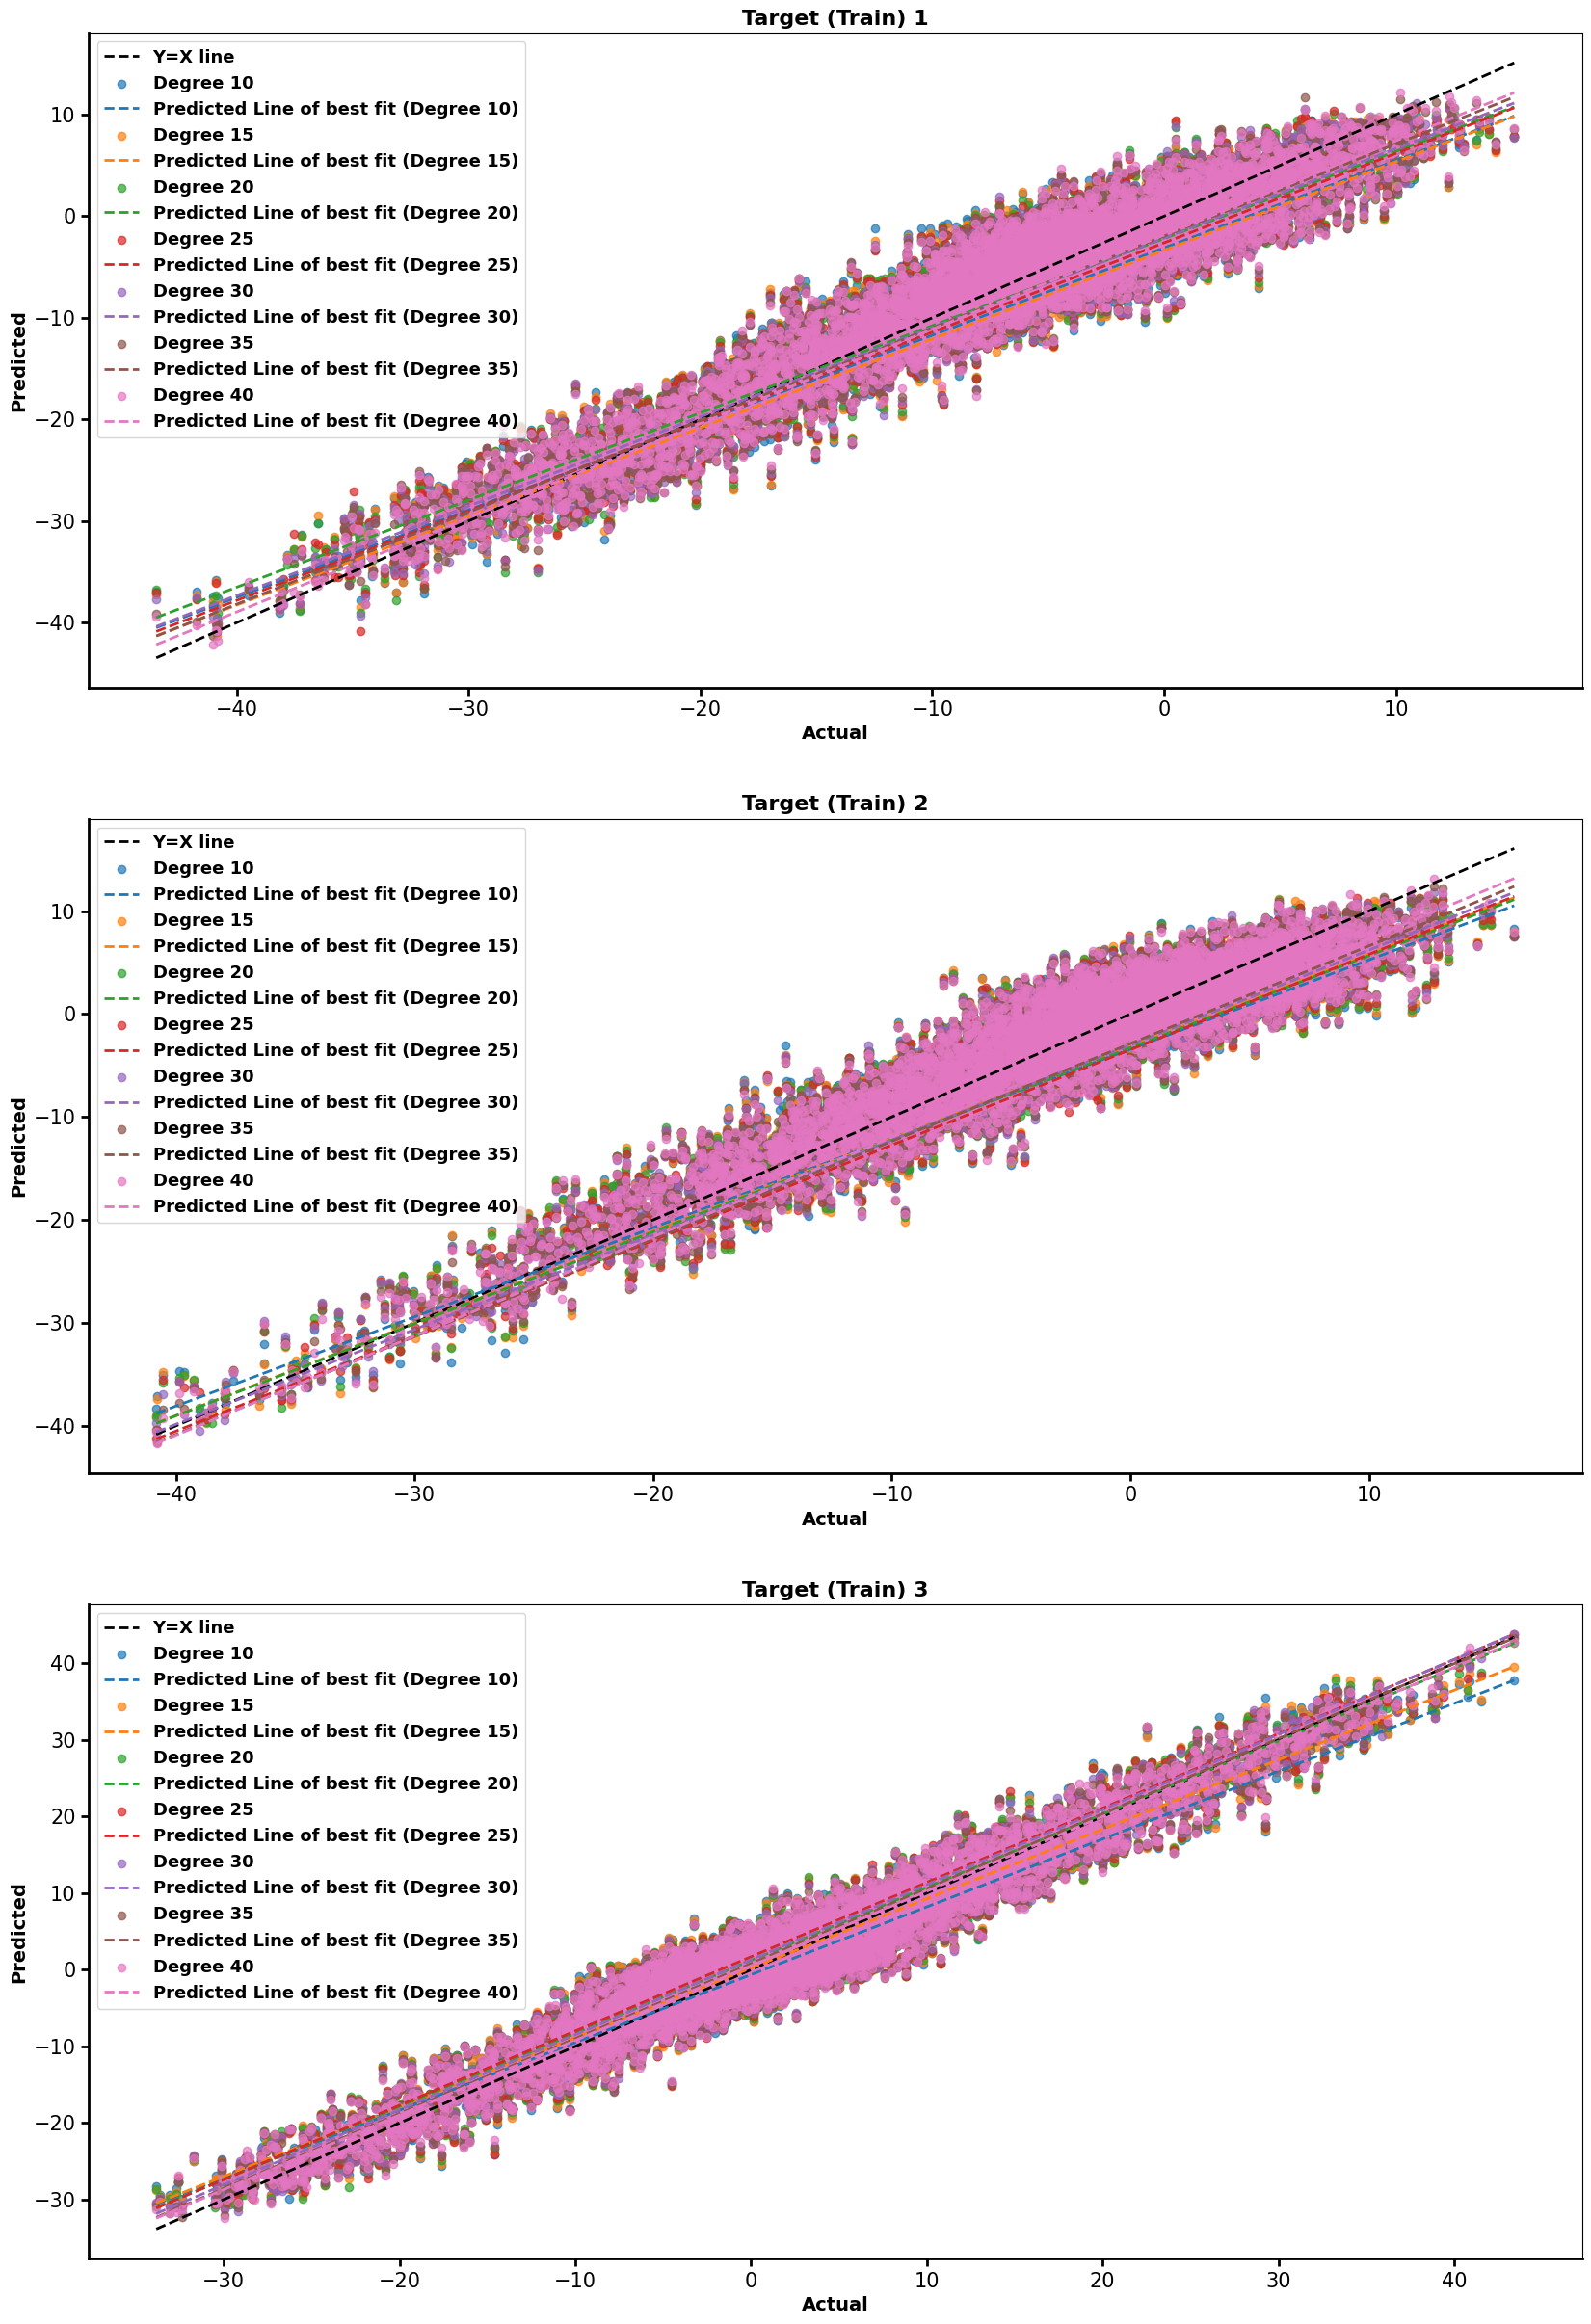

In [4]:
# @title Visualization part 2- Training data
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(20, 30))

# Define colormap
cmap = plt.get_cmap('tab10')
for i in range(3):
    axs[i].plot([Y_train[:, i].min(), Y_train[:, i].max()], [Y_train[:, i].min(), Y_train[:, i].max()], color='black', linestyle='--', label='Y=X line', linewidth=2)

# Iterate over degrees
for idx, degree in enumerate(degrees):
    # Instantiate the PolynomialKernelRegression model
    poly_kernel_reg = PolynomialKernelRegression(degree=degree)

    # Fit the model to the training data
    poly_kernel_reg.fit(X_train, Y_train)

    # Predict the target values for the training data
    Y_pred_train = poly_kernel_reg.predict(X_train)

    # Compute RMSE for each target variable
    rmse = np.sqrt(np.mean((Y_train - Y_pred_train)**2, axis=0))

    # Compute MAE for each target variable
    mae = np.mean(np.abs(Y_train - Y_pred_train), axis=0)

    # Compute Pearson correlation coefficient for each target variable
    std_actual = np.std(Y_train, axis=0)
    std_predicted = np.std(Y_pred_train, axis=0)
    pearson_coeffs = np.zeros(np.shape(Y_train)[1])
    for i in range(np.shape(Y_train)[1]):
        covariance = np.sum((Y_train[:, i] - np.mean(Y_train[:, i])) * (Y_pred_train[:, i] - np.mean(Y_pred_train[:, i]))) / (len(Y_train) - 1)
        pearson_coeffs[i] = covariance / (std_actual[i] * std_predicted[i])

    # Plot actual vs. predicted values and lines
    for i in range(3):
        # Scatter plot for actual vs. predicted values
        axs[i].scatter(Y_train[:, i], Y_pred_train[:, i], label=f'Degree {degree}', color=cmap(idx), alpha=0.7)

        # Plot lines
        axs[i].plot([Y_train[:, i].min(), Y_train[:, i].max()], [Y_pred_train[:, i].min(), Y_pred_train[:, i].max()], color=cmap(idx), linestyle='--', label='Predicted Line of best fit (Degree {})'.format(degree), linewidth=2)

        # Add errors as text
        '''vertical_position = 0.9 - 0.1 * idx
        axs[i].text(0.75, vertical_position, f"Degree {degree}:", transform=axs[i].transAxes, color=cmap(idx), fontsize=10)
        axs[i].text(0.75, vertical_position - 0.05, "RMSE: {:.2f}".format(rmse[i]), transform=axs[i].transAxes, color=cmap(idx), fontsize=10)
        axs[i].text(0.75, vertical_position - 0.10, "MAE: {:.2f}".format(mae[i]), transform=axs[i].transAxes, color=cmap(idx), fontsize=10)
        axs[i].text(0.75, vertical_position - 0.15, "Pearson r: {:.2f}".format(pearson_coeffs[i]), transform=axs[i].transAxes, color=cmap(idx), fontsize=10)
'''
        # Set labels and title
        axs[i].set_xlabel('Actual', fontsize=14, weight='bold')
        axs[i].set_ylabel('Predicted', fontsize=14, weight='bold')
        axs[i].set_title('Target (Train) {}'.format(i+1), fontsize=16, weight='bold')
# Make plot lines and axis bold
        axs[i].tick_params(axis='both', which='major', labelsize=15, width=2, length=6)  # Set major ticks bold
        axs[i].tick_params(axis='both', which='minor', labelsize=15, width=2, length=4)  # Set minor ticks bold
        axs[i].spines['bottom'].set_linewidth(2)  # Set x-axis bold
        axs[i].spines['left'].set_linewidth(2)  # Set y-axis bold
        #axs[i].spines['top'].set_visible(False)  # Hide top spine
        #axs[i].spines['right'].set_visible(False)  # Hide right spine

# Show legend
for ax in axs:
    ax.legend(prop={'size': 13, 'weight': 'bold'})

plt.show()




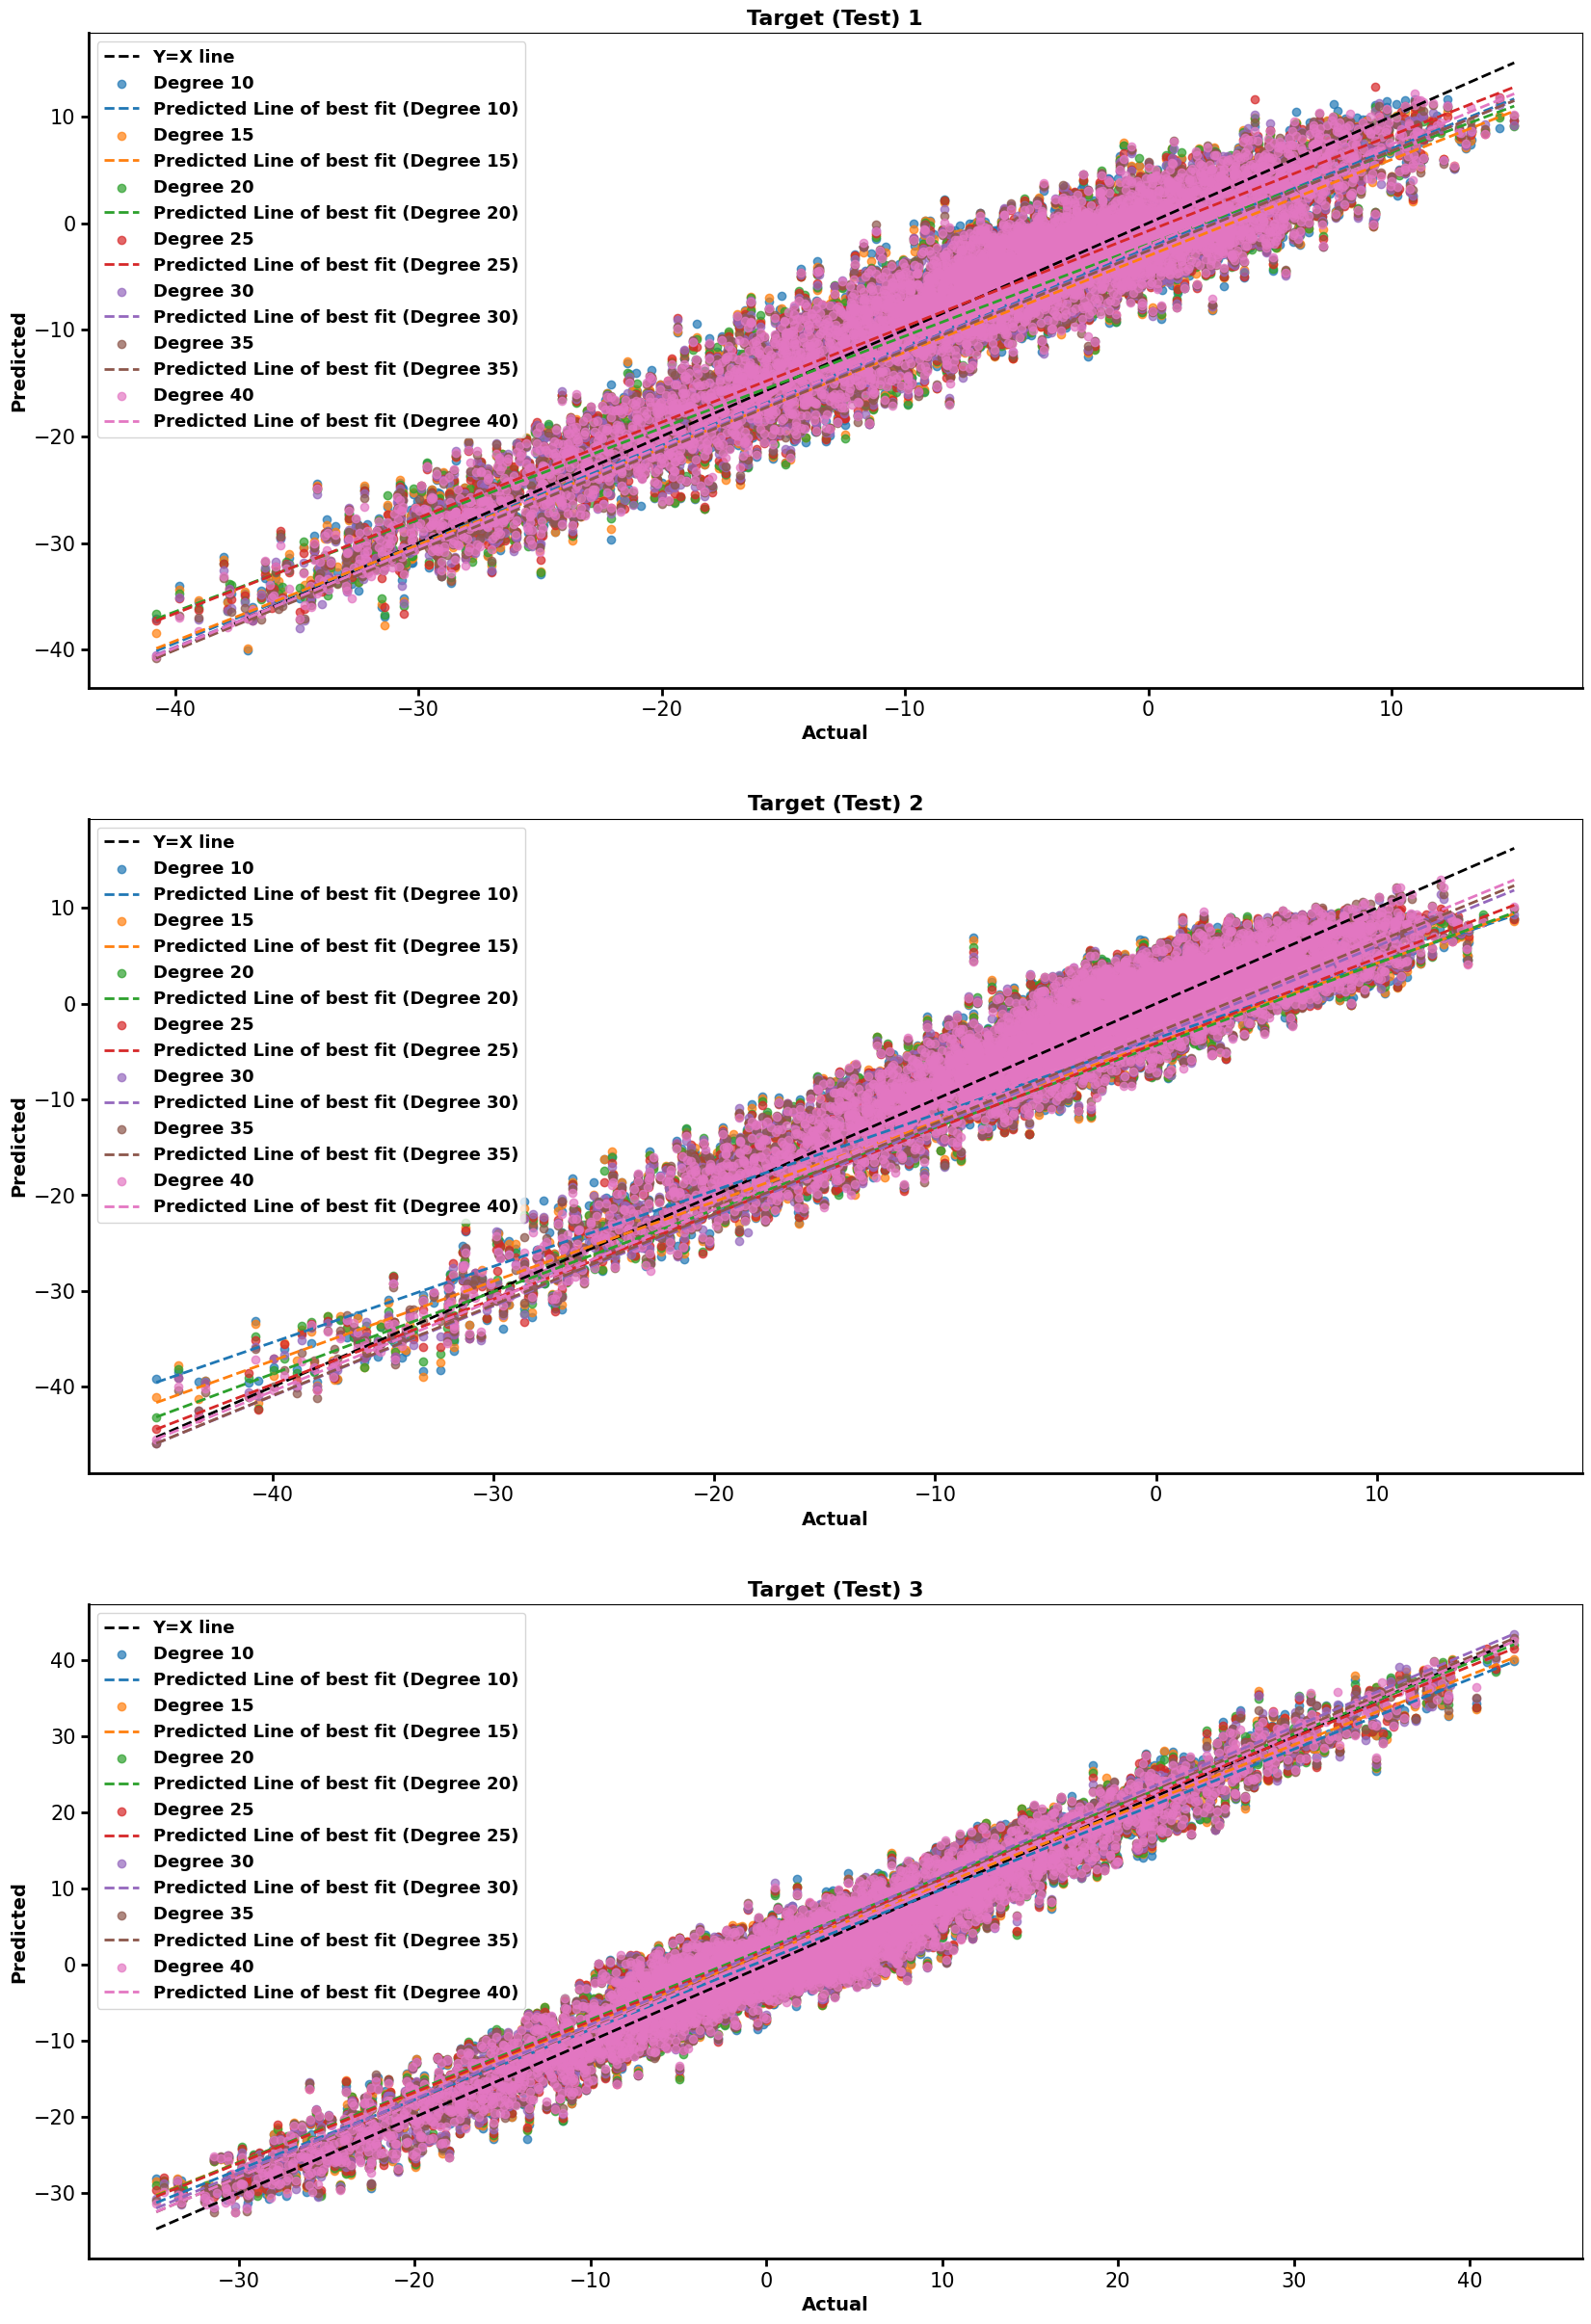

In [5]:
# @title Visualization part 2- Testing data

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(20, 30))

# Define colormap
cmap = plt.get_cmap('tab10')
for i in range(3):
    axs[i].plot([Y_test[:, i].min(), Y_test[:, i].max()], [Y_test[:, i].min(), Y_test[:, i].max()], color='black', linestyle='--', label='Y=X line', linewidth=2)

# Iterate over degrees
for idx, degree in enumerate(degrees):
    # Instantiate the PolynomialKernelRegression model
    poly_kernel_reg = PolynomialKernelRegression(degree=degree)

    # Fit the model to the testing data
    poly_kernel_reg.fit(X_test, Y_test)

    # Predict the target values for the testing data
    Y_pred_test = poly_kernel_reg.predict(X_test)

    # Compute RMSE for each target variable
    rmse = np.sqrt(np.mean((Y_test - Y_pred_test)**2, axis=0))

    # Compute MAE for each target variable
    mae = np.mean(np.abs(Y_test - Y_pred_test), axis=0)

    # Compute Pearson correlation coefficient for each target variable
    std_actual = np.std(Y_test, axis=0)
    std_predicted = np.std(Y_pred_test, axis=0)
    pearson_coeffs = np.zeros(np.shape(Y_train)[1])
    for i in range(np.shape(Y_train)[1]):
        covariance = np.sum((Y_test[:, i] - np.mean(Y_test[:, i])) * (Y_pred_test[:, i] - np.mean(Y_pred_test[:, i]))) / (len(Y_test) - 1)
        pearson_coeffs[i] = covariance / (std_actual[i] * std_predicted[i])

    # Plot actual vs. predicted values and lines
    for i in range(3):
        # Scatter plot for actual vs. predicted values
        axs[i].scatter(Y_test[:, i], Y_pred_test[:, i], label=f'Degree {degree}', color=cmap(idx), alpha=0.7)

        # Plot lines
        axs[i].plot([Y_test[:, i].min(), Y_test[:, i].max()], [Y_pred_test[:, i].min(), Y_pred_test[:, i].max()], color=cmap(idx), linestyle='--', label='Predicted Line of best fit (Degree {})'.format(degree), linewidth=2)

        # Add errors as text
        '''vertical_position = 0.9 - 0.1 * idx
        axs[i].text(0.75, vertical_position, f"Degree {degree}:", transform=axs[i].transAxes, color=cmap(idx), fontsize=10)
        axs[i].text(0.75, vertical_position - 0.05, "RMSE: {:.2f}".format(rmse[i]), transform=axs[i].transAxes, color=cmap(idx), fontsize=10)
        axs[i].text(0.75, vertical_position - 0.10, "MAE: {:.2f}".format(mae[i]), transform=axs[i].transAxes, color=cmap(idx), fontsize=10)
        axs[i].text(0.75, vertical_position - 0.15, "Pearson r: {:.2f}".format(pearson_coeffs[i]), transform=axs[i].transAxes, color=cmap(idx), fontsize=10)
'''
        # Set labels and title
        axs[i].set_xlabel('Actual', fontsize=14, weight='bold')
        axs[i].set_ylabel('Predicted', fontsize=14, weight='bold')
        axs[i].set_title('Target (Test) {}'.format(i+1), fontsize=16, weight='bold')
# Make plot lines and axis bold
        axs[i].tick_params(axis='both', which='major', labelsize=15, width=2, length=6)  # Set major ticks bold
        axs[i].tick_params(axis='both', which='minor', labelsize=15, width=2, length=4)  # Set minor ticks bold
        axs[i].spines['bottom'].set_linewidth(2)  # Set x-axis bold
        axs[i].spines['left'].set_linewidth(2)  # Set y-axis bold
        #axs[i].spines['top'].set_visible(False)  # Hide top spine
        #axs[i].spines['right'].set_visible(False)  # Hide right spine

# Show legend
for ax in axs:
    ax.legend(prop={'size': 13, 'weight': 'bold'})

plt.show()


In [8]:
# @title Conclusion
print('1. Errors decreased as degree of the polynomial increased')
print('2. Pearson coefficient increased as degree of the polynomial increased')
print('3. Errors on testing data were more compared to training data. Pearson coefficient for testing data was less compared to training data')

1. Errors decreased as degree of the polynomial increased
2. Pearson coefficient increased as degree of the polynomial increased
3. Errors on testing data were more compared to training data. Pearson coefficient for testing data was less compared to training data


In [ ]:
# @title Q3 using sigmoid kernel
# Q3

In [23]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("/content/drive/MyDrive/PRNN/Assignment_1/regression_data_uni_group_5_train.txt", skiprows=1, dtype='float')
d = 5
train_ratio = 0.9

# Calculate the sizes of each set
num_samples = len(data)
num_train = int(train_ratio * num_samples)

# Split the data into train, validation, and test sets
yd = 1
X_train, y_train = data[:num_train, :-yd], data[:num_train, -yd:]
X_test, y_test = data[num_train:, :-yd], data[num_train:, -yd:]




Mean Squared Error on testing set: 0.0972731700138129
Mean Absolute Error on testing set: 0.23671413547905107
Pearson correlation coefficient: 0.6069682324636609


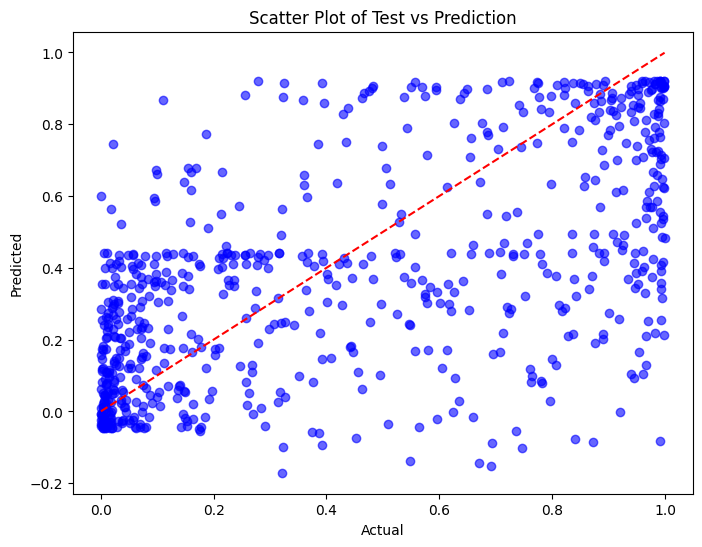

In [38]:
import numpy as np

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the hypothesis function for sigmoidal regression
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

# Compute the design matrix Phi (X with added bias term)
Phi = X_train

# Compute the parameter vector W using the closed-form solution
W = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y_train

# Make predictions on the test set
predictions = np.dot(X_test, W)

# Calculate Mean Squared Error
mse = np.mean((predictions - y_test) ** 2)

# Print the Mean Squared Error
print("Mean Squared Error on testing set:", mse)
# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(predictions - y_test))

# Calculate Pearson correlation coefficient
def pearson_corr(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    std_x = np.std(x)
    std_y = np.std(y)
    cov = np.mean((x - mean_x) * (y - mean_y))
    return cov / (std_x * std_y)

pearson_coeff = pearson_corr(predictions, y_test)

# Print the MAE and Pearson correlation coefficient
print("Mean Absolute Error on testing set:", mae)
print("Pearson correlation coefficient:", pearson_coeff)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Scatter Plot of Test vs Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Libarary Imports

In [3]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Dataset loading and pre processing

In [5]:
def normalize_data(X_train, X_test):
    # Compute mean and std deviation for each feature
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    # Normalize training data
    X_train_normalized = (X_train - mean) / std

    # Normalize test data using mean and std from training data
    X_test_normalized = (X_test - mean) / std

    return X_train_normalized, X_test_normalized

In [6]:
def data_load_split(path):
    # Load the data
    data = np.loadtxt(path, skiprows=1, dtype='float')

    # Shuffle the data
    np.random.shuffle(data)

    # Define proportions for train, validation, and test sets
    train_ratio = 0.8
    test_ratio = 0.2

    # Calculate the sizes of each set
    num_samples = len(data)
    num_train = int(train_ratio * num_samples)
    num_test = num_samples - num_train

    # Split the data into train, validation, and test sets
    X_train, y_train = data[:num_train, :-1], data[:num_train, -1]
    X_test, y_test = data[-num_test:, :-1], data[-num_test:, -1]

    # Normalize the features
    X_train, X_test = normalize_data(X_train, X_test)

    # Print shapes of each set
    print("Train set:", X_train.shape, y_train.shape)
    print("Test set:", X_test.shape, y_test.shape)

    return X_train, y_train, X_test, y_test

In [7]:
path = "/content/drive/MyDrive/Colab Notebooks/Copy of multi_class_classification_data_group_5_train.txt"

X_train, y_train, X_test, y_test = data_load_split(path)

#no of classes
n_classes = np.unique(y_train).shape[0]
print(n_classes)

Train set: (11200, 10) (11200,)
Test set: (2800, 10) (2800,)
2


###ACCURACY

In [8]:
def accuracy(prediction,actual):
  return np.mean(prediction == actual) * 100

###CONFUSION MATRIX

In [9]:
def confusion_matrix(predicted,actual,n_classes):
  conf_mat = np.zeros((n_classes, n_classes))
  for i in range(len(predicted)):
    conf_mat[int(actual[i])][int(predicted[i])] = conf_mat[int(actual[i])][int(predicted[i])] + 1

  return conf_mat

###F1 SCORE

In [10]:
def f1_score(predicted,actual,n_classes):
  conf_mat = confusion_matrix(predicted,actual,n_classes)
  f1_score = np.zeros(n_classes)
  for i in range(n_classes):
    tp = conf_mat[i][i]
    fp = sum([conf_mat[k][i] for k in range(n_classes)]) - tp
    fn = np.sum(conf_mat[i]) -tp
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score[i] = 2 * (precision * recall) / (precision + recall)

  return f1_score


###ROC CURVE

In [11]:
def calculate_roc(y_score, y_true, positive_class):
    thresholds = np.sort(np.unique(y_score))[::-1]

    tpr = []
    fpr = []
    for threshold in thresholds:
        y_pred = np.where(y_score >= threshold, positive_class, ~positive_class)
        tp = np.sum((y_true == positive_class) & (y_pred == positive_class))
        fp = np.sum((y_true != positive_class) & (y_pred == positive_class))
        fn = np.sum((y_true == positive_class) & (y_pred != positive_class))
        tn = np.sum((y_true != positive_class) & (y_pred != positive_class))
        tpr.append(tp / (tp + fn))
        fpr.append(fp / (fp + tn))
    return fpr, tpr

#GAUSSIAN BAYES

###Method:
Step 1: Calculate and store class priors, mean and covariances(ML estimate) of each class using classwise data.

Step 2: Now we have properly defined class conditional and class priors. So, we can calculate posteriors of each each class for each test data

Step 3: Assign test data point, class corresponding to max posterior probability.


In [58]:
class GaussianBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.class_means = None
        self.class_covariances = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = np.zeros(len(self.classes))
        self.class_means = np.zeros((len(self.classes), X.shape[1]))
        self.class_covariances = np.zeros((len(self.classes), X.shape[1], X.shape[1]))

        # Compute class priors
        for i, c in enumerate(self.classes):
            self.class_priors[i] = np.mean(y == c) #mean of (y==c) ==> mean of (y[j] == class)

        # Compute class means and variances
        for i, c in enumerate(self.classes):
            class_data = X[y == c]
            self.class_means[i] = np.mean(class_data, axis=0)
            self.class_covariances[i] = np.cov(class_data, rowvar=False)

    def predict(self, X):
        predictions = []

        # Calculate class probabilities using class-conditional densities
        class_probs = np.zeros(len(self.classes))
        # total loss
        loss = 0.0
        # predicted_score for class 0
        pred_score_C0 = []
        for data_point in X:
          for i, c in enumerate(self.classes):
              class_probs[i] = self._multivariate_normal_pdf(data_point, self.class_means[i], self.class_covariances[i])

          # Predict class with maximum posterior probability
          predictions.append(self.classes[np.argmax(class_probs*self.class_priors)])
          pred_score_C0.append(class_probs[0]*self.class_priors[0])
          loss += 1 - np.max(class_probs*self.class_priors)
        return predictions,loss,pred_score_C0

    def _multivariate_normal_pdf(self, X, mean, co_var):
      D = mean.shape[0]
      diff = X - mean
      exponent = -0.5 * np.dot(diff, np.linalg.inv(co_var)).dot(diff)
      coef = 1 / np.sqrt(((2 * np.pi) ** D) * np.linalg.det(co_var))
      return coef * np.exp(exponent)


###Evaluation

In [59]:
# Train the gaussian bayes
gaussian = GaussianBayes()
gaussian.fit(X_train, y_train)

# Make predictions on the training set
predictions_gaussian_train,train_loss,train_pred_score_C0 = gaussian.predict(X_train)

# Make predictions on the testing set
predictions_gaussian_test,test_loss,test_pred_score_C0 = gaussian.predict(X_test)

# Print training accuracies
print("Training Accuracy (Gaussian Bayes):", accuracy(predictions_gaussian_train,y_train))

# Print testing accuracies
print("Testing Accuracy (Gaussian Bayes):", accuracy(predictions_gaussian_test,y_test))

# f1 score
print(f"f1 scores classwise : {f1_score(predictions_gaussian_test,y_test,int(n_classes))}")

#Empirical loss Training
print(f"Empirical loss Training : {train_loss / len(y_train)}")

#Empirical loss Testing
print(f"Empirical loss Testing : {test_loss / len(y_test)}")

#confusion matrix
print("CONFUSION MATRIX: ")
print(confusion_matrix(predictions_gaussian_test,y_test,int(n_classes)))

Training Accuracy (Gaussian Bayes): 74.70535714285714
Testing Accuracy (Gaussian Bayes): 73.78571428571429
f1 scores classwise : [0.72774481 0.74724518]
Empirical loss Training : 0.9999968512315592
Empirical loss Testing : 0.9999969486831172
CONFUSION MATRIX: 
[[ 981.  419.]
 [ 315. 1085.]]


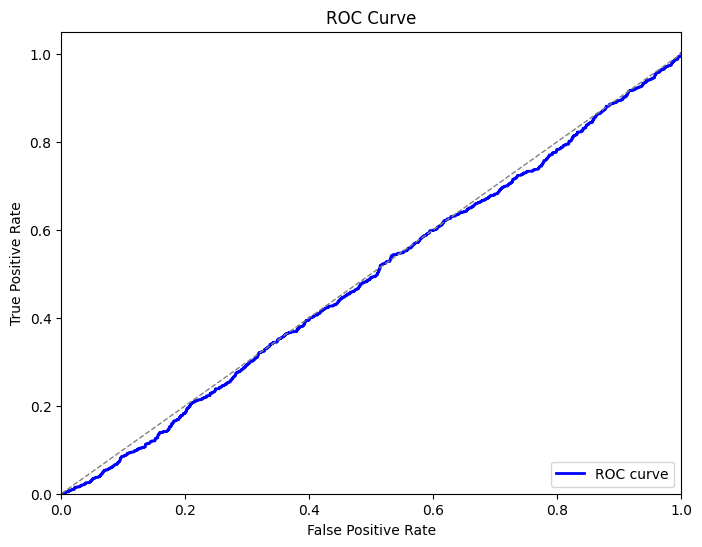

In [60]:
# Assuming positive class is 0
fpr, tpr = calculate_roc(test_pred_score_C0,y_test, 0)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



---



---



#**KNN**

##Method
parameter k : No. Of neighbours

Step 1: For each test data point, find distances between training data points and this point.

Step 2: Sort these training points based on distances calculated above and take first k classes corresponding to these points.

Step 3: Assign this testing point, the class which has majorly occured in above calculated k training points.

In [17]:
def knn(X_train, y_train, X_test, k):
    # Euclidean Distance predictions
    e_predictions = np.zeros(X_test.shape[0])
    # Cosine Distance predictions
    cos_predictions = np.zeros(X_test.shape[0])

    # Compute norms of training points for cosine similarity
    X_train_norms = np.linalg.norm(X_train, axis=1)

    for j, test_point in enumerate(X_test):
        # Compute Euclidean distances
        e_dists = np.linalg.norm(X_train - test_point, axis=1)

        # Compute cosine distances
        cos_dists = 1 - np.dot(X_train, test_point) / (X_train_norms * np.linalg.norm(test_point))

        # Find nearest neighbors and their counts for both distances
        e_knn, e_count = np.unique(y_train[np.argsort(e_dists)][:k], return_counts=True)
        cos_knn, cos_count = np.unique(y_train[np.argsort(cos_dists)][:k], return_counts=True)

        # Predict using majority voting
        e_predictions[j] = e_knn[np.argmax(e_count)]
        cos_predictions[j] = cos_knn[np.argmax(cos_count)]

    return e_predictions, cos_predictions


###Evaluation

In [19]:
accuracies_cosine = {}
accuracies_euclidian = {}
def knn_predictions(k):
  e_predictions,cos_predictions = knn(X_train, y_train, X_test, k)

  print(f"For K == {k} --->")
  print("")
  # Print training accuracies
  accuracies_euclidian[k] = accuracy(e_predictions,y_test)
  print("Testing Accuracy (Euclidian KNN):", accuracy(e_predictions,y_test))

  # Print testing accuracies
  accuracies_cosine[k] = accuracy(cos_predictions,y_test)
  print("Testing Accuracy (Cosine KNN):", accuracy(cos_predictions,y_test))

  #confusion matrix
  print("CONFUSION MATRIX Euclidian: ")
  print(confusion_matrix(e_predictions,y_test,int(n_classes)))

  #confusion matrix
  print("CONFUSION MATRIX Cosine: ")
  print(confusion_matrix(cos_predictions,y_test,int(n_classes)))

  # f1 score Euclidian
  print("Euclidian f1 scores classwise")
  print(f1_score(e_predictions,y_test,int(n_classes)))

  # f1 score Cosine
  print("Euclidian f1 scores classwise")
  print(f1_score(cos_predictions,y_test,int(n_classes)))
  print("")

K = [1,2,3,4,5]
for k in K:
  knn_predictions(k)

For K == 1 --->

Testing Accuracy (Euclidian KNN): 69.53571428571429
Testing Accuracy (Cosine KNN): 70.17857142857142
CONFUSION MATRIX Euclidian: 
[[ 923.  509.]
 [ 344. 1024.]]
CONFUSION MATRIX Cosine: 
[[978. 454.]
 [381. 987.]]
Euclidian f1 scores classwise
[0.68395702 0.70596346]
Euclidian f1 scores classwise
[0.70082408 0.70274119]

For K == 2 --->

Testing Accuracy (Euclidian KNN): 69.75
Testing Accuracy (Cosine KNN): 70.5
CONFUSION MATRIX Euclidian: 
[[1153.  279.]
 [ 568.  800.]]
CONFUSION MATRIX Cosine: 
[[1218.  214.]
 [ 612.  756.]]
Euclidian f1 scores classwise
[0.73136695 0.65386187]
Euclidian f1 scores classwise
[0.74678112 0.64670659]

For K == 3 --->

Testing Accuracy (Euclidian KNN): 72.89285714285715
Testing Accuracy (Cosine KNN): 74.89285714285714
CONFUSION MATRIX Euclidian: 
[[ 941.  491.]
 [ 268. 1100.]]
CONFUSION MATRIX Cosine: 
[[1036.  396.]
 [ 307. 1061.]]
Euclidian f1 scores classwise
[0.71260886 0.74349442]
Euclidian f1 scores classwise
[0.74666667 0.75115044

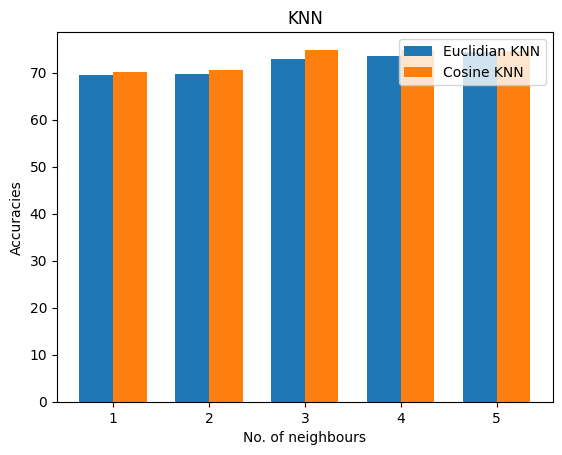

In [20]:
# Extracting keys and values from both dictionaries
labels = list(accuracies_euclidian.keys())
values1 = list(accuracies_euclidian.values())
values2 = list(accuracies_cosine.values())

# Setting the width of the bars
bar_width = 0.35
x = np.arange(len(labels))

# Creating bar graph
plt.bar(x - bar_width/2, values1, bar_width, label='Euclidian KNN')
plt.bar(x + bar_width/2, values2, bar_width, label='Cosine KNN')

# Adding labels and title
plt.xlabel('No. of neighbours')
plt.ylabel('Accuracies')
plt.title('KNN')

# Adding x-axis labels
plt.xticks(x, labels)

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


###ANALYSIS

1. As we can see at k == 5 both cosine and euclidian knn performs well on testing data.

2. It depend on classwise data distribution of training data.



---



---



#Linear Classifiers ( O vs R )

##Method:

Loss Functions used: Hinge and Cross Entropy

Steps for a finding optimal parameters of linear classifier of a single class (C). Repeat below steps for each class.

Step 1: Modify y_train into binary implies if it belong to Class C or not.

Step 2: Using Gradient Descent find optimal parameters.

Step 3: Repeat above steps for each class and store it.

Step 4: For a test data use optimal parameters of each linear classifier to predict scores.

Step 5: Choose the class to max score.

In [52]:
class OneVsRest:
  def __init__(self,n_classes,n_features):
    # [bias,W] for all classes
    self.theta_cross = np.random.rand(n_classes, n_features + 1)
    self.theta_hinge = np.random.rand(n_classes, n_features + 1)


  # Sigmoid function
  def sigmoid(self,z):
      return 1 / (1 + np.exp(-z))

  # gradient descent for gradient descent
  def gradient_descent_cross(self,X_bias, y, theta, learning_rate, n_iterations,tolrence):
      m = len(y)
      i = 0
      grad_norm = 1
      while grad_norm > tolrence:
          h = self.sigmoid(np.dot(X_bias, theta))
          gradient = np.dot(X_bias.T, (h - y)) / m
          grad_norm = np.linalg.norm(gradient)
          theta -= learning_rate * gradient
          i = i+1
          if i > n_iterations:
            break
      return theta

  # hinge loss function
  def hinge_loss(self, z, y):
      loss = np.maximum(0, 1 - z * y)
      return loss

  # gradient descent for hinge loss
  def gradient_descent_hinge(self, X_bias, y, theta, learning_rate, n_iterations, tolerance):
      m = len(y)
      i = 0
      grad_norm = 1
      while grad_norm > tolerance:
          z = np.dot(X_bias, theta)
          hinge_loss = self.hinge_loss(z, y)
          gradient = np.dot(X_bias.T, (-y * (hinge_loss > 0))) / m
          grad_norm = np.linalg.norm(gradient)
          theta -= learning_rate * gradient
          i += 1
          if i > n_iterations:
              break
      return theta


  def fit(self,X_train,y_train):
    # no of classes
    classes = np.unique(y_train)

    # no of features
    n_features = X_train.shape[1]

    # X_train and 1 is stacked
    X_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

    for i,c in enumerate(classes):
      # modified labels for binary one vs rest
      new_y_train = np.where(c==y_train,1,0)

      # apply gradient descent using cross entropy loss function
      self.theta_cross[i] = self.gradient_descent_cross(X_bias,new_y_train,self.theta_cross[i],0.01,1000,1e-6)

      # apply gradient descent using hinge loss function
      self.theta_hinge[i] = self.gradient_descent_hinge(X_bias,new_y_train,self.theta_hinge[i],0.01,1000,1e-6)


  def predict(self,X_test,y_test):
    # stacking X_test with 1
    new_X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    # storing predictions data of all n binary classifiers for all test data points
    predictions_cross = []
    predictions_hinge = []

    # predicting probabilities of all classes and for testing data point
    predictions_probs_cross = np.zeros((self.theta_cross.shape[0],X_test.shape[0]))
    predictions_probs_hinge = np.zeros((self.theta_hinge.shape[0],X_test.shape[0]))


    for i in range(self.theta_cross.shape[0]):
      predictions_probs_cross[i] = self.sigmoid(np.dot(new_X_test,self.theta_cross[i]))
      predictions_probs_hinge[i] = np.dot(new_X_test,self.theta_hinge[i])

    predictions_cross = np.argmax(predictions_probs_cross, axis=0)
    predictions_hinge = np.argmax(predictions_probs_hinge, axis=0)

    # Compute cross-entropy loss
    loss_cross = 0.0
    for i in range(X_test.shape[0]):
        for j in range(self.theta_cross.shape[0]):
            loss_cross += - (y_test[i] * np.log(predictions_probs_cross[j][i]) + (1 - y_test[i]) * np.log(1 - predictions_probs_cross[j][i]))

    # Average the loss over all testing samples
    loss_cross /= X_test.shape[0]

    # Compute hinge loss
    loss_hinge = 0.0
    for i in range(X_test.shape[0]):
        for j in range(self.theta_hinge.shape[0]):
            loss_hinge += np.maximum(0, 1 - y_test[i] * predictions_probs_hinge[j][i])

    # Average the loss over all testing samples
    loss_hinge /= X_test.shape[0]

    return predictions_cross,predictions_hinge,loss_cross,loss_hinge,predictions_probs_cross[0]



In [53]:
#no of classes
n_classes = np.unique(y_train).shape[0]
n_features = X_train.shape[1]
linear_classifier = OneVsRest(n_classes,n_features)
linear_classifier.fit(X_train,y_train)
predictions_cross,predictions_hinge,loss_cross,loss_hinge,test_prob_cross_C0 = linear_classifier.predict(X_test,y_test)

#Accuracy
print(f"Accuracy of Linear Classifier using Cross Entropy: {accuracy(predictions_cross,y_test)}")
print(f"Accuracy of Linear Classifier using Hinge loss: {accuracy(predictions_hinge,y_test)}")


# f1 score Euclidian
print("Linear Classifier f1 scores classwise using cross entropy")
print(f1_score(predictions_cross,y_test,int(n_classes)))
print("Linear Classifier f1 scores classwise using Hinge loss")
print(f1_score(predictions_hinge,y_test,int(n_classes)))


#confusion matrix
print("CONFUSION MATRIX Linear Classifier using cross Entropy: ")
print(confusion_matrix(predictions_cross,y_test,int(n_classes)))
print("CONFUSION MATRIX Linear Classifier using Hinge loss: ")
print(confusion_matrix(predictions_hinge,y_test,int(n_classes)))

#Emperical Loss for testing
print(f"Emperical loss Testing using Cross Entropy = {loss_cross}")
print(f"Emperical loss Testing using Hinge Entropy = {loss_hinge}")

#Emperical Loss for training
predictions_cross,predictions_hinge,loss_cross,loss_hinge,train_prob_cross_C0 = linear_classifier.predict(X_train,y_train)
print(f"Emperical loss Training using Cross Entropy = {loss_cross}")
print(f"Emperical loss Training using Hinge Entropy = {loss_hinge}")

Accuracy of Linear Classifier using Cross Entropy: 69.35714285714286
Accuracy of Linear Classifier using Hinge loss: 58.71428571428572
Linear Classifier f1 scores classwise using cross entropy
[0.69092219 0.69617564]
Linear Classifier f1 scores classwise using Hinge loss
[0.54737666 0.62048588]
CONFUSION MATRIX Linear Classifier using cross Entropy: 
[[959. 441.]
 [417. 983.]]
CONFUSION MATRIX Linear Classifier using Hinge loss: 
[[699. 701.]
 [455. 945.]]
Emperical loss Testing using Cross Entropy = 1.693976842090593
Emperical loss Testing using Hinge Entropy = 1.0051870384114108
Emperical loss Training using Cross Entropy = 1.6952538488860283
Emperical loss Training using Hinge Entropy = 1.0036519906233485


####TESING ROC CURVE

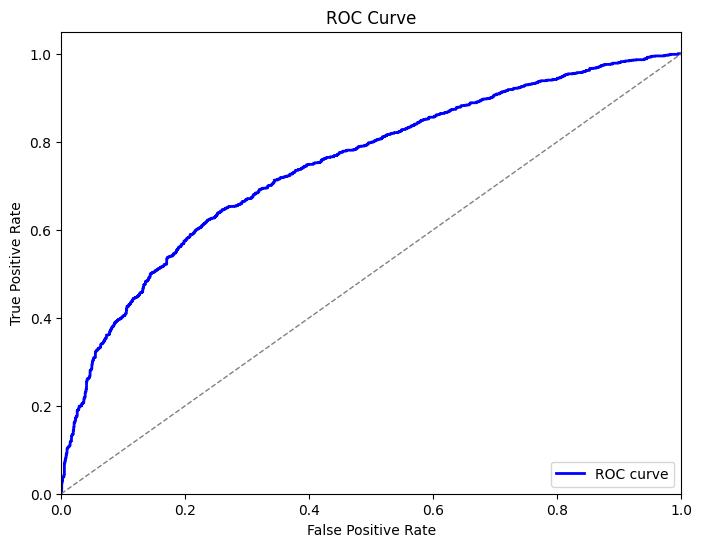

In [57]:
# Assuming positive class is 0
fpr, tpr = calculate_roc(test_prob_cross_C0,y_test,0)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

####TRAINING ROC

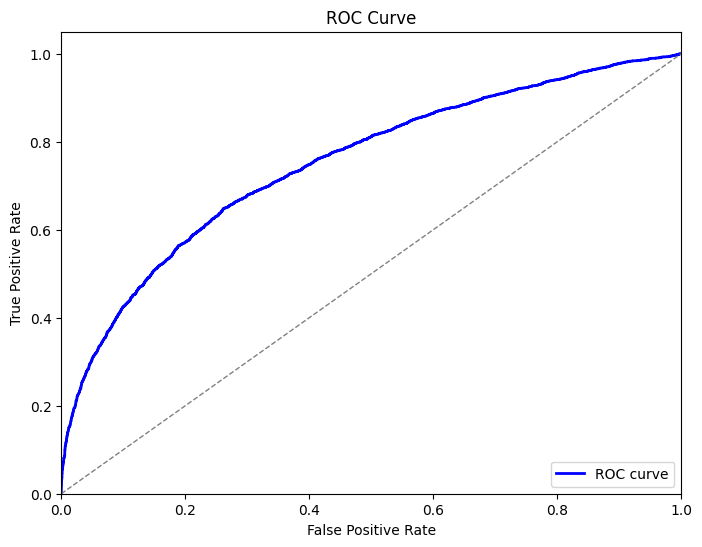

In [63]:
# Assuming positive class is 0
fpr, tpr = calculate_roc(train_prob_cross_C0,y_train,0)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



---



---



#PARZEN WINDOW

###Method:

Step 1: For each test data point find classwise scores using a kernel.

Step 2: Assign class corresponding to max score.

In [22]:
class ParzenWindowClassifier:
    def __init__(self, h=1.0):
        self.h = h  # Bandwidth parameter for the Gaussian kernel

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.classes = np.unique(y_train)

    # Gasussian Kernel
    def gaussian_kernel(self, x, x_i):
        return np.exp(-0.5 * np.sum((x - x_i) ** 2, axis=1) / self.h ** 2) / (np.sqrt(2 * np.pi) * self.h)
    # Uniform Kernel
    def uniform_kernel(self, x, x_i):
        distance = np.linalg.norm(x - x_i, axis=1)
        return np.where(distance <= self.h, 1 / (len(x_i[0]) * self.h ** len(x[0])), 0)

    # Parzen Window Utility function for a data point
    def parzen_window(self, x):
        gaussian_class_probs = {}
        uniform_class_probs = {}

        #Each operation in below loop is class wise
        for label in self.classes:
            # seprating training data classwise
            class_indices = np.where(self.y_train == label)[0]
            class_points = self.X_train[class_indices]

            #finding score of test data point wrt to training data using different kernels
            gaussian_kernel_sum = np.sum(self.gaussian_kernel(x, class_points))
            uniform_kernel_sum = np.sum(self.uniform_kernel(x, class_points))

            #Storing it in dict
            gaussian_class_probs[label] = gaussian_kernel_sum / len(class_indices)
            uniform_class_probs[label] = uniform_kernel_sum / len(class_indices)
        return gaussian_class_probs, uniform_class_probs


    def predict(self, X_test):
        gaussian_kernel_predictions = []
        uniform_kernel_predictions = []
        for x in X_test:
            # get the prob scores for each class for a test data point.
            gaussian_class_probs, uniform_class_probs = self.parzen_window(x[np.newaxis, :])
            # Assign class corresponding to the max score
            gaussian_predicted_class = max(gaussian_class_probs, key=gaussian_class_probs.get)
            uniform_predicted_class = max(uniform_class_probs, key=uniform_class_probs.get)
            gaussian_kernel_predictions.append(gaussian_predicted_class)
            uniform_kernel_predictions.append(uniform_predicted_class)
        return gaussian_kernel_predictions, uniform_kernel_predictions


In [23]:
accuracies_gaussian = {}
accuracies_uniform = {}

def parzen(h):
  parzen_classifier = ParzenWindowClassifier(h)
  parzen_classifier.fit(X_train, y_train)

  gaussian_kernel_predictions,uniform_kernel_predictions = parzen_classifier.predict(X_test)

  print(f"h == {h} --->")
  accuracies_gaussian[h] = accuracy(gaussian_kernel_predictions,y_test)
  accuracies_uniform[h] = accuracy(uniform_kernel_predictions,y_test)
  print("Testing Accuracy Parzen with Gaussian kernel:", accuracy(gaussian_kernel_predictions,y_test))
  print("Testing Accuracy Parzen with Uniform kernel:", accuracy(uniform_kernel_predictions,y_test))

  #confusion matrix Gaussian
  print("CONFUSION MATRIX Gaussian Kernel")
  print(confusion_matrix(gaussian_kernel_predictions,y_test,int(n_classes)))

  #confusion matrix Uniform
  print("CONFUSION MATRIX Uniform Kernel")
  print(confusion_matrix(uniform_kernel_predictions,y_test,int(n_classes)))

  # f1 score Gaussian
  print("Gaussian f1 scores classwise")
  print(f1_score(gaussian_kernel_predictions,y_test,int(n_classes)))

  # f1 score Uniform
  print("Uniform f1 scores classwise")
  print(f1_score(uniform_kernel_predictions,y_test,int(n_classes)))
  print("")

H = [1,2,3,4,5]
for h in H:
  parzen(h)



h == 1 --->
Testing Accuracy Parzen with Gaussian kernel: 72.32142857142857
Testing Accuracy Parzen with Uniform kernel: 54.50000000000001
CONFUSION MATRIX Gaussian Kernel
[[ 797.  635.]
 [ 140. 1228.]]
CONFUSION MATRIX Uniform Kernel
[[1396.   36.]
 [1238.  130.]]
Gaussian f1 scores classwise
[0.67285775 0.76013618]
Uniform f1 scores classwise
[0.68666995 0.16949153]

h == 2 --->
Testing Accuracy Parzen with Gaussian kernel: 65.21428571428571
Testing Accuracy Parzen with Uniform kernel: 75.14285714285714
CONFUSION MATRIX Gaussian Kernel
[[ 562.  870.]
 [ 104. 1264.]]
CONFUSION MATRIX Uniform Kernel
[[ 972.  460.]
 [ 236. 1132.]]
Gaussian f1 scores classwise
[0.53574833 0.72187322]
Uniform f1 scores classwise
[0.73636364 0.76486486]

h == 3 --->
Testing Accuracy Parzen with Gaussian kernel: 63.42857142857142
Testing Accuracy Parzen with Uniform kernel: 70.92857142857143
CONFUSION MATRIX Gaussian Kernel
[[ 502.  930.]
 [  94. 1274.]]
CONFUSION MATRIX Uniform Kernel
[[ 752.  680.]
 [ 134

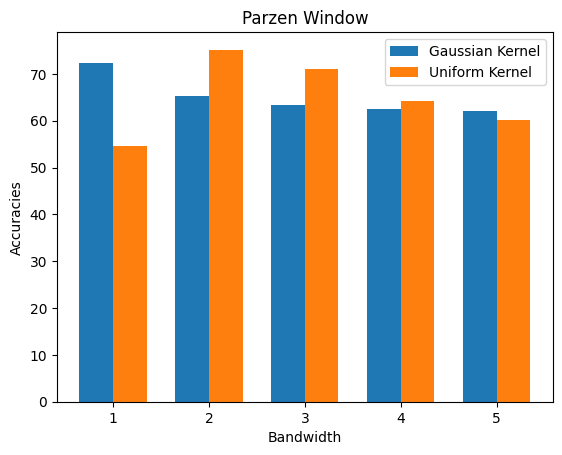

In [24]:
# Extracting keys and values from both dictionaries
labels = list(accuracies_gaussian.keys())
values1 = list(accuracies_gaussian.values())
values2 = list(accuracies_uniform.values())

# Setting the width of the bars
bar_width = 0.35
x = np.arange(len(labels))

# Creating bar graph
plt.bar(x - bar_width/2, values1, bar_width, label='Gaussian Kernel')
plt.bar(x + bar_width/2, values2, bar_width, label='Uniform Kernel')

# Adding labels and title
plt.xlabel('Bandwidth')
plt.ylabel('Accuracies')
plt.title('Parzen Window')

# Adding x-axis labels
plt.xticks(x, labels)

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


### ANALYSIS:

1. for h == 1, gaussian kernel performs well

2. for h == 2, uniform kernel performs well

3. further increasing value of h, decreases the performence



---



---



#EM ALGORITHM

###Methods

Hyper Parameter: No. of Gaussian Mixtures (n_components)

Step 1: Seperate X_train for each class.Lets work for a class C

Step 2: Assume some initial parameters(pi,mu,var) for each gaussian.

Step 3: Perform E step for finding gamma

Step 4: Perform M step: Update parameters

Step 5: Check if parameters converged or not.

Step 6: Store this set of parameters.

Step 6: Repeat for all classes and store them also.

In [64]:
class GMMClassifier:
    def __init__(self, n_classes, n_components, max_iter=100, tol=1e-4):
        self.n_classes = n_classes
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.gmms = [None] * n_classes

    def fit(self, X_train, y_train):
        likelihoods = []
        for c in range(self.n_classes):
            ll = []
            X_c = X_train[y_train == c]
            gmm = self.initialize_gmm(X_c)
            # gmm[c] stores pi,mu,co_var of all gaussian mixtures
            gmm, likelihood = self.em_algorithm(X_c, gmm)
            self.gmms[c] = gmm
            if(c == 0):
              likelihoods = likelihood
        return likelihoods

    def predict(self, X_test):
        probabilities = np.zeros((X_test.shape[0], self.n_classes))
        for c, gmm in enumerate(self.gmms):
            probabilities[:, c] = np.sum([pi * self.multivariate_normal_pdf(X_test, mean=mu, cov=cov)
                                           for pi, mu, cov in zip(gmm['pi'], gmm['mu'], gmm['cov'])], axis=0)
        return np.argmax(probabilities, axis=1)

    def initialize_gmm(self, X):
        n_features = X.shape[1]
        pi = np.ones(self.n_components) / self.n_components
        mu = X[np.random.choice(X.shape[0], self.n_components, replace=False)]
        cov = [np.eye(n_features) for _ in range(self.n_components)]
        return {'pi': pi, 'mu': mu, 'cov': cov}

    def em_algorithm(self, X, gmm):
        likelihoods = []
        for _ in range(self.max_iter):
            # E step
            gamma = self.compute_gamma(X, gmm)
            # M step
            new_gmm = self.update_parameters(X, gamma)
            # Compute log-likelihood
            likelihood = self.compute_log_likelihood(X, new_gmm)
            likelihoods.append(likelihood)
            # Convergence checking
            if self.converge_check(gmm, new_gmm):
                break
            # Parameter update
            gmm = new_gmm
        return gmm, likelihoods

    def compute_gamma(self, X, gmm):
        # finding all gammas for each gaussian using X(classwise training data)
        likelihoods = np.array([self.multivariate_normal_pdf(X, mean=gmm['mu'][i], cov=gmm['cov'][i]) * gmm['pi'][i]
                                 for i in range(self.n_components)]).T
        return likelihoods / np.sum(likelihoods, axis=1, keepdims=True)

    def update_parameters(self, X, gamma):
        # denominator --> sum of all gammas
        N_c = np.sum(gamma, axis=0)
        # Estimation of Mixture coefficient.
        # pi = N_c/N
        pi_new = N_c / X.shape[0]
        # Estimation of Mean.
        # 1/N_c(sum of gamma * x)
        mu_new = np.dot(gamma.T, X) / N_c[:, None]
        # Estimation of covariance
        cov_new = [(np.dot((X - mu).T, (X - mu) * gamma[:, i][:, np.newaxis]) / N_c[i] + 1e-6 * np.eye(X.shape[1]))
                  for i, mu in enumerate(mu_new)]
        return {'pi': pi_new, 'mu': mu_new, 'cov': cov_new}


    def compute_log_likelihood(self, X, gmm):
        likelihoods = np.array([self.multivariate_normal_pdf(X, mean=gmm['mu'][i], cov=gmm['cov'][i]) * gmm['pi'][i]
                                 for i in range(self.n_components)]).T
        return np.sum(np.log(np.sum(likelihoods, axis=1)))

    def converge_check(self, gmm1, gmm2):
        # if all parameters are close enough, return True
        return np.allclose(gmm1['pi'], gmm2['pi'], rtol=self.tol) \
               and np.allclose(gmm1['mu'], gmm2['mu'], rtol=self.tol) \
               and np.allclose(gmm1['cov'], gmm2['cov'], rtol=self.tol)

    def multivariate_normal_pdf(self, X, mean, cov):
        n_features = X.shape[1]
        det_cov = np.linalg.det(cov)
        norm_const = 1.0 / ((2 * np.pi) ** (n_features / 2) * det_cov ** (1.0 / 2))
        inv_cov = np.linalg.inv(cov)
        diff = X - mean
        exponent = -0.5 * np.sum(np.dot(diff, inv_cov) * diff, axis=1)
        return norm_const * np.exp(exponent)



In [65]:
accuracies = {}
likelihoods = []

def gmm(components):
  gmm_classifier = GMMClassifier(n_classes=2, n_components=components)
  likelihoods.append(gmm_classifier.fit(X_train, y_train))

  # Predict
  y_pred = gmm_classifier.predict(X_test)

  print(f"For n_components == {c} --->")
  print("")
  # Print training accuracies
  accuracies[components] = accuracy(y_pred,y_test)
  print("Testing Accuracy (GMM):", accuracies[components])


  #confusion matrix
  print("CONFUSION MATRIX GMM: ")
  print(confusion_matrix(y_pred,y_test,int(n_classes)))

  # f1 score GMM
  print("GMM f1 scores classwise")
  print(f1_score(y_pred,y_test,int(n_classes)))
  print("")

components = [1,2,3,4,5,6]
for c in components:
  gmm(c)

For n_components == 1 --->

Testing Accuracy (GMM): 73.42857142857143
CONFUSION MATRIX GMM: 
[[ 981.  451.]
 [ 293. 1075.]]
GMM f1 scores classwise
[0.72505543 0.74291638]

For n_components == 2 --->

Testing Accuracy (GMM): 79.35714285714286
CONFUSION MATRIX GMM: 
[[1068.  364.]
 [ 214. 1154.]]
GMM f1 scores classwise
[0.78703021 0.7997228 ]

For n_components == 3 --->

Testing Accuracy (GMM): 81.10714285714286
CONFUSION MATRIX GMM: 
[[1117.  315.]
 [ 214. 1154.]]
GMM f1 scores classwise
[0.80854144 0.81353542]

For n_components == 4 --->

Testing Accuracy (GMM): 81.85714285714286
CONFUSION MATRIX GMM: 
[[1142.  290.]
 [ 218. 1150.]]
GMM f1 scores classwise
[0.81805158 0.81908832]

For n_components == 5 --->

Testing Accuracy (GMM): 81.92857142857143
CONFUSION MATRIX GMM: 
[[1145.  287.]
 [ 219. 1149.]]
GMM f1 scores classwise
[0.81902718 0.81954351]

For n_components == 6 --->

Testing Accuracy (GMM): 81.53571428571429
CONFUSION MATRIX GMM: 
[[1140.  292.]
 [ 225. 1143.]]
GMM f1 scor

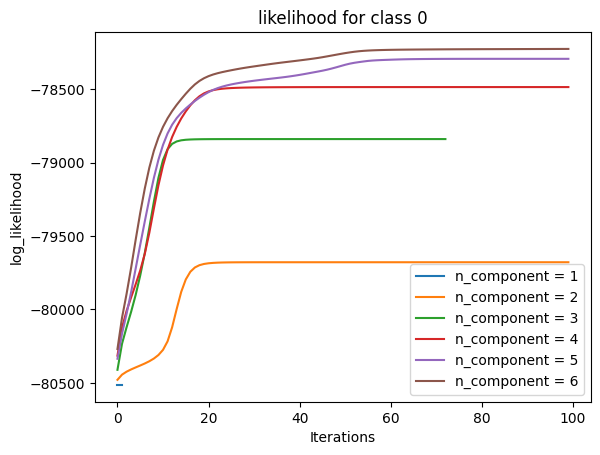

In [68]:
for i,l in enumerate(likelihoods):
  list1 = l
  # Plotting the first list
  plt.plot(list1, label=f'n_component = {i+1}')


# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('log_likelihood')
plt.title('likelihood for class 0')

# Adding legend
plt.legend()

# Display the plot
plt.show()

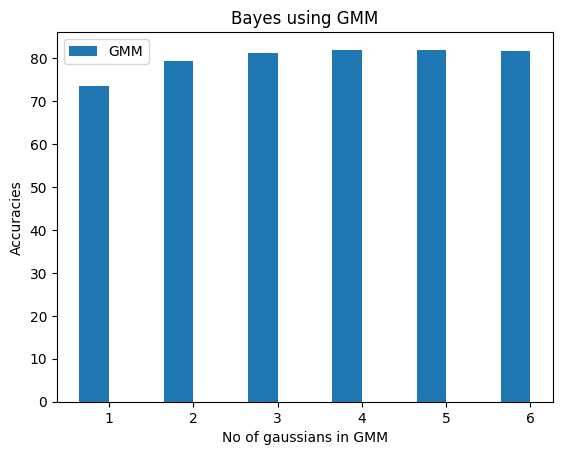

In [69]:
# Extracting keys and values from both dictionaries
labels = list(accuracies.keys())
values1 = list(accuracies.values())

# Setting the width of the bars
bar_width = 0.35
x = np.arange(len(labels))

# Creating bar graph
plt.bar(x - bar_width/2, values1, bar_width, label='GMM')

# Adding labels and title
plt.xlabel('No of gaussians in GMM')
plt.ylabel('Accuracies')
plt.title('Bayes using GMM')

# Adding x-axis labels
plt.xticks(x, labels)

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


###ANALYSIS:

1. Number of Components(No. of Gaussians) == 2 or 3 gives the best result and increasing further is not improving the performence significantly.


### Libarary Imports

In [15]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Dataset loading and pre processing

In [17]:
def normalize_data(X_train, X_test):
    # Compute mean and std deviation for each feature
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    # Normalize training data
    X_train_normalized = (X_train - mean) / std

    # Normalize test data using mean and std from training data
    X_test_normalized = (X_test - mean) / std

    return X_train_normalized, X_test_normalized

In [18]:
def data_load_split(path):
    # Load the data
    data = np.loadtxt(path, skiprows=1, dtype='float')

    # Shuffle the data
    np.random.shuffle(data)

    # Define proportions for train, validation, and test sets
    train_ratio = 0.8
    test_ratio = 0.2

    # Calculate the sizes of each set
    num_samples = len(data)
    num_train = int(train_ratio * num_samples)
    num_test = num_samples - num_train

    # Split the data into train, validation, and test sets
    X_train, y_train = data[:num_train, :-1], data[:num_train, -1]
    X_test, y_test = data[-num_test:, :-1], data[-num_test:, -1]

    # Normalize the features
    X_train, X_test = normalize_data(X_train, X_test)

    # Print shapes of each set
    print("Train set:", X_train.shape, y_train.shape)
    print("Test set:", X_test.shape, y_test.shape)

    return X_train, y_train, X_test, y_test

In [66]:
path = "/content/drive/MyDrive/Colab Notebooks/multi_class_classification/multi_class_classification_data_group_5_train.txt"


X_train, y_train, X_test, y_test = data_load_split(path)

#no of classes
n_classes = np.unique(y_train).shape[0]
print(n_classes)

Train set: (56000, 25) (56000,)
Test set: (14000, 25) (14000,)
10


###ACCURACY

In [20]:
def accuracy(prediction,actual):
  return np.mean(prediction == actual) * 100

###CONFUSION MATRIX

In [21]:
def confusion_matrix(predicted,actual,n_classes):
  conf_mat = np.zeros((n_classes, n_classes))
  for i in range(len(predicted)):
    conf_mat[int(actual[i])][int(predicted[i])] = conf_mat[int(actual[i])][int(predicted[i])] + 1

  return conf_mat

###F1 SCORE

In [22]:
def f1_score(predicted,actual,n_classes):
  conf_mat = confusion_matrix(predicted,actual,n_classes)
  f1_score = np.zeros(n_classes)
  for i in range(n_classes):
    tp = conf_mat[i][i]
    fp = sum([conf_mat[k][i] for k in range(n_classes)]) - tp
    fn = np.sum(conf_mat[i]) -tp
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score[i] = 2 * (precision * recall) / (precision + recall)

  return f1_score


###ROC CURVE

In [23]:
def calculate_roc(y_score, y_true, positive_class):
    thresholds = np.sort(np.unique(y_score))[::-1]

    tpr = []
    fpr = []
    for threshold in thresholds:
        y_pred = np.where(y_score >= threshold, positive_class, ~positive_class)
        tp = np.sum((y_true == positive_class) & (y_pred == positive_class))
        fp = np.sum((y_true != positive_class) & (y_pred == positive_class))
        fn = np.sum((y_true == positive_class) & (y_pred != positive_class))
        tn = np.sum((y_true != positive_class) & (y_pred != positive_class))
        tpr.append(tp / (tp + fn))
        fpr.append(fp / (fp + tn))
    return fpr, tpr

#GAUSSIAN BAYES

###Method:
Step 1: Calculate and store class priors, mean and covariances(ML estimate) of each class using classwise data.

Step 2: Now we have properly defined class conditional and class priors. So, we can calculate posteriors of each each class for each test data

Step 3: Assign test data point, class corresponding to max posterior probability.


In [24]:
class GaussianBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.class_means = None
        self.class_covariances = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = np.zeros(len(self.classes))
        self.class_means = np.zeros((len(self.classes), X.shape[1]))
        self.class_covariances = np.zeros((len(self.classes), X.shape[1], X.shape[1]))

        # Compute class priors
        for i, c in enumerate(self.classes):
            self.class_priors[i] = np.mean(y == c) #mean of (y==c) ==> mean of (y[j] == class)

        # Compute class means and variances
        for i, c in enumerate(self.classes):
            class_data = X[y == c]
            self.class_means[i] = np.mean(class_data, axis=0)
            self.class_covariances[i] = np.cov(class_data, rowvar=False)

    def predict(self, X):
        predictions = []

        # Calculate class probabilities using class-conditional densities
        class_probs = np.zeros(len(self.classes))
        # total loss
        loss = 0.0
        # predicted_score for class 0
        pred_score_C0 = []
        for data_point in X:
          for i, c in enumerate(self.classes):
              class_probs[i] = self._multivariate_normal_pdf(data_point, self.class_means[i], self.class_covariances[i])

          # Predict class with maximum posterior probability
          predictions.append(self.classes[np.argmax(class_probs*self.class_priors)])
          pred_score_C0.append(class_probs[0]*self.class_priors[0])
          loss += 1 - np.max(class_probs*self.class_priors)
        return predictions,loss,pred_score_C0

    def _multivariate_normal_pdf(self, X, mean, co_var):
      D = mean.shape[0]
      diff = X - mean
      exponent = -0.5 * np.dot(diff, np.linalg.inv(co_var)).dot(diff)
      coef = 1 / np.sqrt(((2 * np.pi) ** D) * np.linalg.det(co_var))
      return coef * np.exp(exponent)


###Evaluation

In [25]:
# Train the gaussian bayes
gaussian = GaussianBayes()
gaussian.fit(X_train, y_train)

# Make predictions on the training set
predictions_gaussian_train,train_loss,train_pred_score_C0 = gaussian.predict(X_train)

# Make predictions on the testing set
predictions_gaussian_test,test_loss,test_pred_score_C0 = gaussian.predict(X_test)

# Print training accuracies
print("Training Accuracy (Gaussian Bayes):", accuracy(predictions_gaussian_train,y_train))

# Print testing accuracies
print("Testing Accuracy (Gaussian Bayes):", accuracy(predictions_gaussian_test,y_test))

# f1 score
print(f"f1 scores classwise : {f1_score(predictions_gaussian_test,y_test,int(n_classes))}")

# #Empirical loss Training
# print(f"Empirical loss Training : {train_loss / len(y_train)}")

# #Empirical loss Testing
# print(f"Empirical loss Testing : {test_loss / len(y_test)}")

#confusion matrix
print("CONFUSION MATRIX: ")
print(confusion_matrix(predictions_gaussian_test,y_test,int(n_classes)))

Training Accuracy (Gaussian Bayes): 48.3
Testing Accuracy (Gaussian Bayes): 47.31428571428572
f1 scores classwise : [0.4298065  0.53622705 0.46720214 0.40175719 0.49963899 0.47505423
 0.46623685 0.45901639 0.45516256 0.52136182]
Empirical loss Training : 0.9999999999999974
Empirical loss Testing : 0.9999999999999931
CONFUSION MATRIX: 
[[522.  85.  80.  86.  78. 105. 101.  75. 125.  64.]
 [ 50. 803.  88.  50.  63.  75.  64. 137.  70.  63.]
 [ 57.  78. 698.  69.  70. 119.  84.  60.  88.  55.]
 [ 98.  92. 127. 503.  73. 104. 123.  97.  98.  96.]
 [ 59.  80. 130.  61. 692.  79.  94.  60.  72.  98.]
 [ 75.  76. 116.  66.  65. 657.  60.  75.  56. 103.]
 [ 74.  78. 106.  73.  87.  80. 687.  86.  72.  94.]
 [ 42.  92.  87.  62.  75.  55. 125. 644.  95. 112.]
 [ 77.  88. 108.  63.  81.  67.  72. 104. 637.  97.]
 [ 54.  60.  70.  60.  61.  76. 100.  79.  92. 781.]]


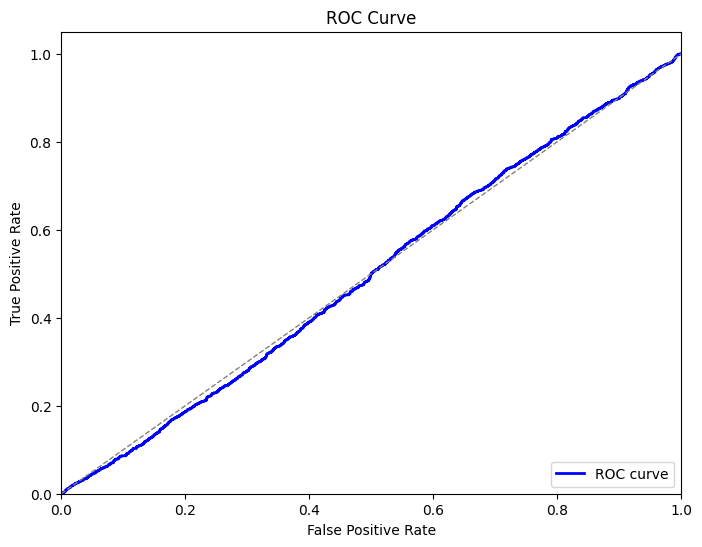

In [26]:
# Assuming positive class is 0
fpr, tpr = calculate_roc(test_pred_score_C0,y_test, 0)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



---



---



#**KNN**

##Method
parameter k : No. Of neighbours

Step 1: For each test data point, find distances between training data points and this point.

Step 2: Sort these training points based on distances calculated above and take first k classes corresponding to these points.

Step 3: Assign this testing point, the class which has majorly occured in above calculated k training points.

In [27]:
def knn(X_train, y_train, X_test, k):
    # Euclidean Distance predictions
    e_predictions = np.zeros(X_test.shape[0])
    # Cosine Distance predictions
    cos_predictions = np.zeros(X_test.shape[0])

    # Compute norms of training points for cosine similarity
    X_train_norms = np.linalg.norm(X_train, axis=1)

    for j, test_point in enumerate(X_test):
        # Compute Euclidean distances
        e_dists = np.linalg.norm(X_train - test_point, axis=1)

        # Compute cosine distances
        cos_dists = 1 - np.dot(X_train, test_point) / (X_train_norms * np.linalg.norm(test_point))

        # Find nearest neighbors and their counts for both distances
        e_knn, e_count = np.unique(y_train[np.argsort(e_dists)][:k], return_counts=True)
        cos_knn, cos_count = np.unique(y_train[np.argsort(cos_dists)][:k], return_counts=True)

        # Predict using majority voting
        e_predictions[j] = e_knn[np.argmax(e_count)]
        cos_predictions[j] = cos_knn[np.argmax(cos_count)]

    return e_predictions, cos_predictions


###Evaluation

In [51]:
accuracies_cosine = {}
accuracies_euclidian = {}
limit = 6000
def knn_predictions(k):
  e_predictions,cos_predictions = knn(X_train, y_train, X_test[:limit], k)

  print(f"For K == {k} --->")
  print("")
  # Print training accuracies
  accuracies_euclidian[k] = accuracy(e_predictions,y_test[:limit])
  print("Testing Accuracy (Euclidian KNN):", accuracy(e_predictions,y_test[:limit]))

  # Print testing accuracies
  accuracies_cosine[k] = accuracy(cos_predictions,y_test[:limit])
  print("Testing Accuracy (Cosine KNN):", accuracy(cos_predictions,y_test[:limit]))

  #confusion matrix
  print("CONFUSION MATRIX Euclidian: ")
  print(confusion_matrix(e_predictions,y_test,int(n_classes)))

  #confusion matrix
  print("CONFUSION MATRIX Cosine: ")
  print(confusion_matrix(cos_predictions,y_test,int(n_classes)))

  # f1 score Euclidian
  print("Euclidian f1 scores classwise")
  print(f1_score(e_predictions,y_test,int(n_classes)))

  # f1 score Cosine
  print("Euclidian f1 scores classwise")
  print(f1_score(cos_predictions,y_test,int(n_classes)))
  print("")

K = [1,2,3,4,5]
for k in K:
  knn_predictions(k)

For K == 1 --->

Testing Accuracy (Euclidian KNN): 36.71666666666666
Testing Accuracy (Cosine KNN): 40.63333333333333
CONFUSION MATRIX Euclidian: 
[[139.  43.  59.  38.  33.  46.  45.  45.  53.  45.]
 [ 35. 210.  66.  49.  41.  44.  47.  79.  37.  50.]
 [ 32.  36. 228.  38.  30.  36.  51.  43.  39.  36.]
 [ 37.  27.  50. 168.  40.  64.  63.  69.  51.  56.]
 [ 26.  37.  54.  42. 201.  35.  52.  53.  51.  49.]
 [ 37.  33.  36.  36.  20. 230.  36.  31.  37.  40.]
 [ 33.  32.  49.  32.  29.  34. 265.  64.  40.  36.]
 [ 31.  51.  42.  37.  29.  37.  40. 281.  36.  42.]
 [ 32.  38.  41.  38.  30.  51.  33.  52. 247.  46.]
 [ 21.  47.  37.  43.  37.  56.  40.  62.  41. 234.]]
CONFUSION MATRIX Cosine: 
[[185.  32.  39.  40.  43.  45.  37.  41.  42.  42.]
 [ 35. 243.  48.  50.  52.  42.  32.  65.  38.  53.]
 [ 50.  37. 228.  42.  33.  51.  32.  36.  34.  26.]
 [ 55.  26.  46. 217.  30.  57.  50.  55.  45.  44.]
 [ 43.  36.  39.  44. 242.  33.  40.  33.  50.  40.]
 [ 48.  33.  27.  46.  33. 238.

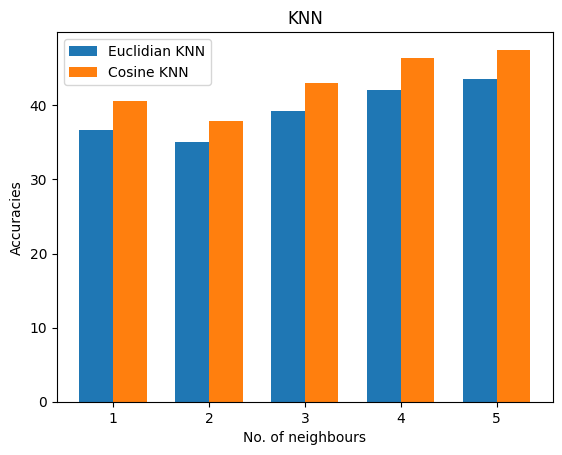

In [52]:
# Extracting keys and values from both dictionaries
labels = list(accuracies_euclidian.keys())
values1 = list(accuracies_euclidian.values())
values2 = list(accuracies_cosine.values())

# Setting the width of the bars
bar_width = 0.35
x = np.arange(len(labels))

# Creating bar graph
plt.bar(x - bar_width/2, values1, bar_width, label='Euclidian KNN')
plt.bar(x + bar_width/2, values2, bar_width, label='Cosine KNN')

# Adding labels and title
plt.xlabel('No. of neighbours')
plt.ylabel('Accuracies')
plt.title('KNN')

# Adding x-axis labels
plt.xticks(x, labels)

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


###ANALYSIS

1. As we can see at k == 5 both cosine and euclidian knn performs well on testing data.

2. It depend on classwise data distribution of training data.



---



---



#Linear Classifiers ( O vs R )

##Method:

Loss Functions used: Hinge and Cross Entropy

Steps for a finding optimal parameters of linear classifier of a single class (C). Repeat below steps for each class.

Step 1: Modify y_train into binary implies if it belong to Class C or not.

Step 2: Using Gradient Descent find optimal parameters.

Step 3: Repeat above steps for each class and store it.

Step 4: For a test data use optimal parameters of each linear classifier to predict scores.

Step 5: Choose the class to max score.

In [31]:
class OneVsRest:
  def __init__(self,n_classes,n_features):
    # [bias,W] for all classes
    self.theta_cross = np.random.rand(n_classes, n_features + 1)
    self.theta_hinge = np.random.rand(n_classes, n_features + 1)


  # Sigmoid function
  def sigmoid(self,z):
      return 1 / (1 + np.exp(-z))

  # gradient descent for gradient descent
  def gradient_descent_cross(self,X_bias, y, theta, learning_rate, n_iterations,tolrence):
      m = len(y)
      i = 0
      grad_norm = 1
      while grad_norm > tolrence:
          h = self.sigmoid(np.dot(X_bias, theta))
          gradient = np.dot(X_bias.T, (h - y)) / m
          grad_norm = np.linalg.norm(gradient)
          theta -= learning_rate * gradient
          i = i+1
          if i > n_iterations:
            break
      return theta

  # hinge loss function
  def hinge_loss(self, z, y):
      loss = np.maximum(0, 1 - z * y)
      return loss

  # gradient descent for hinge loss
  def gradient_descent_hinge(self, X_bias, y, theta, learning_rate, n_iterations, tolerance):
      m = len(y)
      i = 0
      grad_norm = 1
      while grad_norm > tolerance:
          z = np.dot(X_bias, theta)
          hinge_loss = self.hinge_loss(z, y)
          gradient = np.dot(X_bias.T, (-y * (hinge_loss > 0))) / m
          grad_norm = np.linalg.norm(gradient)
          theta -= learning_rate * gradient
          i += 1
          if i > n_iterations:
              break
      return theta


  def fit(self,X_train,y_train):
    # no of classes
    classes = np.unique(y_train)

    # no of features
    n_features = X_train.shape[1]

    # X_train and 1 is stacked
    X_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

    for i,c in enumerate(classes):
      # modified labels for binary one vs rest
      new_y_train = np.where(c==y_train,1,0)

      # apply gradient descent using cross entropy loss function
      self.theta_cross[i] = self.gradient_descent_cross(X_bias,new_y_train,self.theta_cross[i],0.01,1000,1e-6)

      # apply gradient descent using hinge loss function
      self.theta_hinge[i] = self.gradient_descent_hinge(X_bias,new_y_train,self.theta_hinge[i],0.01,1000,1e-6)


  def predict(self,X_test,y_test):
    # stacking X_test with 1
    new_X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    # storing predictions data of all n binary classifiers for all test data points
    predictions_cross = []
    predictions_hinge = []

    # predicting probabilities of all classes and for testing data point
    predictions_probs_cross = np.zeros((self.theta_cross.shape[0],X_test.shape[0]))
    predictions_probs_hinge = np.zeros((self.theta_hinge.shape[0],X_test.shape[0]))


    for i in range(self.theta_cross.shape[0]):
      predictions_probs_cross[i] = self.sigmoid(np.dot(new_X_test,self.theta_cross[i]))
      predictions_probs_hinge[i] = np.dot(new_X_test,self.theta_hinge[i])

    predictions_cross = np.argmax(predictions_probs_cross, axis=0)
    predictions_hinge = np.argmax(predictions_probs_hinge, axis=0)

    # Compute cross-entropy loss
    loss_cross = 0.0
    for i in range(X_test.shape[0]):
        for j in range(self.theta_cross.shape[0]):
            loss_cross += - (y_test[i] * np.log(predictions_probs_cross[j][i]) + (1 - y_test[i]) * np.log(1 - predictions_probs_cross[j][i]))

    # Average the loss over all testing samples
    loss_cross /= X_test.shape[0]

    # Compute hinge loss
    loss_hinge = 0.0
    for i in range(X_test.shape[0]):
        for j in range(self.theta_hinge.shape[0]):
            loss_hinge += np.maximum(0, 1 - y_test[i] * predictions_probs_hinge[j][i])

    # Average the loss over all testing samples
    loss_hinge /= X_test.shape[0]

    return predictions_cross,predictions_hinge,loss_cross,loss_hinge,predictions_probs_cross[0]



In [32]:
#no of classes
n_classes = np.unique(y_train).shape[0]
n_features = X_train.shape[1]
linear_classifier = OneVsRest(n_classes,n_features)
linear_classifier.fit(X_train,y_train)
predictions_cross,predictions_hinge,loss_cross,loss_hinge,test_prob_cross_C0 = linear_classifier.predict(X_test,y_test)

#Accuracy
print(f"Accuracy of Linear Classifier using Cross Entropy: {accuracy(predictions_cross,y_test)}")
print(f"Accuracy of Linear Classifier using Hinge loss: {accuracy(predictions_hinge,y_test)}")


# f1 score Euclidian
print("Linear Classifier f1 scores classwise using cross entropy")
print(f1_score(predictions_cross,y_test,int(n_classes)))
print("Linear Classifier f1 scores classwise using Hinge loss")
print(f1_score(predictions_hinge,y_test,int(n_classes)))


#confusion matrix
print("CONFUSION MATRIX Linear Classifier using cross Entropy: ")
print(confusion_matrix(predictions_cross,y_test,int(n_classes)))
print("CONFUSION MATRIX Linear Classifier using Hinge loss: ")
print(confusion_matrix(predictions_hinge,y_test,int(n_classes)))

#Emperical Loss for testing
print(f"Emperical loss Testing using Cross Entropy = {loss_cross}")
print(f"Emperical loss Testing using Hinge Entropy = {loss_hinge}")

#Emperical Loss for training
predictions_cross,predictions_hinge,loss_cross,loss_hinge,train_prob_cross_C0 = linear_classifier.predict(X_train,y_train)
print(f"Emperical loss Training using Cross Entropy = {loss_cross}")
print(f"Emperical loss Training using Hinge Entropy = {loss_hinge}")

Accuracy of Linear Classifier using Cross Entropy: 23.985714285714284
Accuracy of Linear Classifier using Hinge loss: 14.807142857142857
Linear Classifier f1 scores classwise using cross entropy
[0.23501034 0.23912274 0.23134064 0.18562628 0.2474762  0.28720627
 0.2197615  0.20965309 0.28088701 0.24421691]
Linear Classifier f1 scores classwise using Hinge loss
[0.11173709 0.19137691 0.20213434 0.07077856 0.08707608 0.12910707
 0.18094985 0.16070901 0.10161481 0.1615704 ]
CONFUSION MATRIX Linear Classifier using cross Entropy: 
[[341. 129. 115.  94.  87. 141.  66.  98. 174.  76.]
 [134. 338. 148.  72. 198. 123.  81. 171. 105.  93.]
 [157.  94. 327. 101. 199. 132.  65.  74. 147.  82.]
 [108. 125. 175. 226. 184. 205.  87. 109. 117.  75.]
 [171.  88. 105.  90. 429. 156.  91.  54. 118. 123.]
 [111. 126.  92.  93. 123. 440.  72. 103.  64. 125.]
 [136. 141. 125. 157. 165. 148. 258. 132.  79.  96.]
 [149. 148.  68.  73. 234.  86. 101. 278. 129. 123.]
 [138.  82. 146.  59. 212. 109.  41. 119. 3

###Analysis
As we can see linear classifier(O V R) for multi class performs poorly.

####TESING ROC CURVE

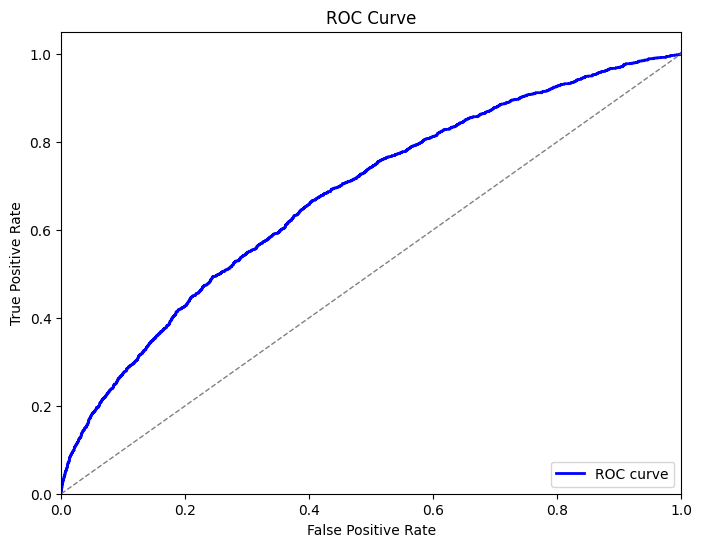

In [33]:
# Assuming positive class is 0
fpr, tpr = calculate_roc(test_prob_cross_C0,y_test,0)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

####TRAINING ROC

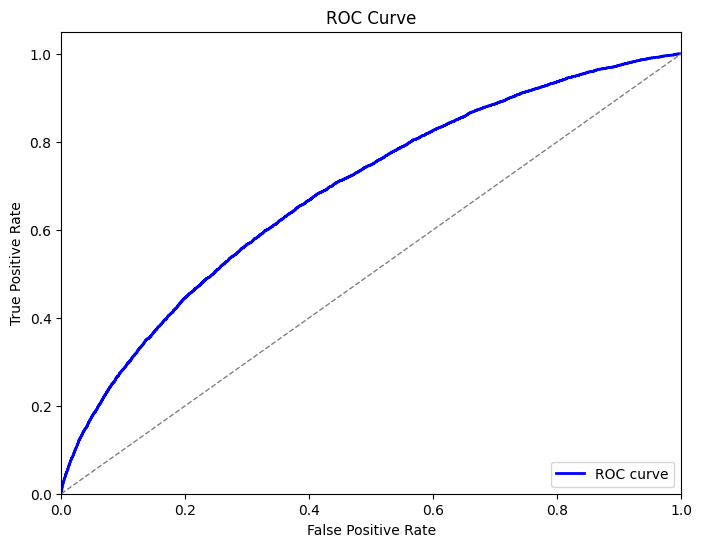

In [34]:
# Assuming positive class is 0
fpr, tpr = calculate_roc(train_prob_cross_C0,y_train,0)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



---



---



#PARZEN WINDOW

###Method:

Step 1: For each test data point find classwise scores using a kernel.

Step 2: Assign class corresponding to max score.

In [83]:
class ParzenWindowClassifier:
    def __init__(self, h=1.0):
        self.h = h  # Bandwidth parameter for the Gaussian kernel

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.classes = np.unique(y_train)

    # Gasussian Kernel
    def gaussian_kernel(self, x, x_i):
        return np.exp(-0.5 * np.sum((x - x_i) ** 2, axis=1) / self.h ** 2) / (np.sqrt(2 * np.pi) * self.h)

    # Uniform Kernel
    def uniform_kernel(self, x, x_i):
        distance = np.linalg.norm(x - x_i, axis=1)
        return np.where(distance <= self.h, 1 / (len(x_i[0]) * self.h ** len(x[0])), 0)

    # Parzen Window Utility function for a data point
    def parzen_window(self, x):
        gaussian_class_probs = {}
        uniform_class_probs = {}

        #Each operation in below loop is class wise
        for label in self.classes:
            # seprating training data classwise
            class_indices = np.where(self.y_train == label)[0]
            class_points = self.X_train[class_indices]

            #finding score of test data point wrt to training data using different kernels
            gaussian_kernel_sum = np.sum(self.gaussian_kernel(x, class_points))
            uniform_kernel_sum = np.sum(self.uniform_kernel(x, class_points))

            #Storing it in dict
            gaussian_class_probs[label] = gaussian_kernel_sum / len(class_indices)
            uniform_class_probs[label] = uniform_kernel_sum / len(class_indices)
        return gaussian_class_probs, uniform_class_probs


    def predict(self, X_test):
        gaussian_kernel_predictions = []
        uniform_kernel_predictions = []
        for x in X_test:
            # get the prob scores for each class for a test data point.
            gaussian_class_probs, uniform_class_probs = self.parzen_window(x[np.newaxis, :])
            # Assign class corresponding to the max score
            gaussian_predicted_class = max(gaussian_class_probs, key=gaussian_class_probs.get)
            uniform_predicted_class = max(uniform_class_probs, key=uniform_class_probs.get)
            gaussian_kernel_predictions.append(gaussian_predicted_class)
            uniform_kernel_predictions.append(uniform_predicted_class)
        return gaussian_kernel_predictions, uniform_kernel_predictions


In [84]:
accuracies_gaussian = {}
accuracies_uniform = {}
limit = 1000
def parzen(h):
  parzen_classifier = ParzenWindowClassifier(h)
  parzen_classifier.fit(X_train, y_train)

  gaussian_kernel_predictions,uniform_kernel_predictions = parzen_classifier.predict(X_test[:limit])

  print(f"h == {h} --->")
  accuracies_gaussian[h] = accuracy(gaussian_kernel_predictions,y_test[:limit])
  accuracies_uniform[h] = accuracy(uniform_kernel_predictions,y_test[:limit])
  print(np.unique(uniform_kernel_predictions))
  print("Testing Accuracy Parzen with Gaussian kernel:", accuracy(gaussian_kernel_predictions,y_test[:limit]))
  print("Testing Accuracy Parzen with Uniform kernel:", accuracy(uniform_kernel_predictions,y_test[:limit]))

  #confusion matrix Gaussian
  print("CONFUSION MATRIX Gaussian Kernel")
  print(confusion_matrix(gaussian_kernel_predictions,y_test[:limit],int(n_classes)))

  #confusion matrix Uniform
  print("CONFUSION MATRIX Uniform Kernel")
  print(confusion_matrix(uniform_kernel_predictions,y_test[:limit],int(n_classes)))

  # f1 score Gaussian
  print("Gaussian f1 scores classwise")
  print(f1_score(gaussian_kernel_predictions,y_test[:limit],int(n_classes)))

  # f1 score Uniform
  print("Uniform f1 scores classwise")
  print(f1_score(uniform_kernel_predictions,y_test[:limit],int(n_classes)))
  print("")

H = [1,2,3,4,5]
for h in H:
  parzen(h)



h == 1 --->
[0.]
Testing Accuracy Parzen with Gaussian kernel: 50.3
Testing Accuracy Parzen with Uniform kernel: 8.7
CONFUSION MATRIX Gaussian Kernel
[[22. 10.  5.  3.  3.  2. 14. 12.  9.  7.]
 [ 2. 49. 10.  2.  7.  7.  7. 12.  4.  4.]
 [ 2.  4. 56.  3.  1.  4. 13.  7.  5.  3.]
 [ 1.  8.  8. 45.  2. 10.  6. 10. 10.  9.]
 [ 1.  2. 11.  2. 42. 12.  4. 11.  9.  7.]
 [ 0.  7.  9.  2.  0. 54.  9.  6.  6.  5.]
 [ 1.  3. 10.  2.  3.  6. 55. 14.  3.  6.]
 [ 1.  7.  1.  0.  2.  7.  9. 61.  6.  4.]
 [ 3.  3.  3.  1.  3.  3.  7. 13. 58.  6.]
 [ 1.  4.  4.  0.  2.  2. 11. 10.  7. 61.]]
CONFUSION MATRIX Uniform Kernel
[[ 87.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [104.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 98.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [109.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [101.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 98.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [103.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 98.   0.   0.

<ipython-input-22-fd2373a1c1ab>:8: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


h == 2 --->
[0.]
Testing Accuracy Parzen with Gaussian kernel: 35.699999999999996
Testing Accuracy Parzen with Uniform kernel: 8.7
CONFUSION MATRIX Gaussian Kernel
[[ 0.  7. 12.  0.  0.  6. 17. 24. 13.  8.]
 [ 0. 40.  8.  1.  0.  5. 10. 31.  6.  3.]
 [ 1.  2. 51.  2.  1.  4.  8. 18.  4.  7.]
 [ 0.  5. 17. 20.  1. 13.  9. 25. 12.  7.]
 [ 0.  0. 16.  0. 14. 13. 10. 29. 11.  8.]
 [ 0.  7. 10.  1.  1. 41.  3. 25.  6.  4.]
 [ 0.  3. 13.  0.  1.  4. 43. 29.  3.  7.]
 [ 0.  6.  8.  0.  0.  3.  4. 74.  0.  3.]
 [ 0.  0. 13.  1.  1.  5.  9. 26. 36.  9.]
 [ 0.  5.  7.  0.  0. 10. 11. 26.  5. 38.]]
CONFUSION MATRIX Uniform Kernel
[[ 87.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [104.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 98.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [109.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [101.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 98.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [103.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [

<ipython-input-22-fd2373a1c1ab>:10: RuntimeWarning: invalid value encountered in scalar divide
  f1_score[i] = 2 * (precision * recall) / (precision + recall)


h == 3 --->
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Testing Accuracy Parzen with Gaussian kernel: 27.700000000000003
Testing Accuracy Parzen with Uniform kernel: 15.0
CONFUSION MATRIX Gaussian Kernel
[[ 0.  5. 15.  0.  0.  5. 12. 32. 10.  8.]
 [ 0. 27. 12.  0.  0.  4.  7. 45.  5.  4.]
 [ 0.  2. 45.  1.  1.  3.  6. 23.  7. 10.]
 [ 0.  5. 25.  8.  1. 13.  9. 32.  9.  7.]
 [ 0.  1. 17.  0.  6. 14. 10. 34. 10.  9.]
 [ 0.  3. 12.  1.  0. 38.  2. 30.  5.  7.]
 [ 0.  2. 17.  0.  1.  3. 27. 41.  4.  8.]
 [ 0.  4. 12.  0.  0.  4.  2. 72.  0.  4.]
 [ 0.  0. 16.  0.  1.  4. 10. 37. 25.  7.]
 [ 0.  3.  6.  0.  0. 10.  8. 40.  6. 29.]]
CONFUSION MATRIX Uniform Kernel
[[85.  1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [91.  4.  2.  2.  0.  1.  0.  4.  0.  0.]
 [84.  1.  6.  1.  0.  0.  2.  0.  3.  1.]
 [98.  0.  0.  7.  0.  1.  0.  1.  0.  2.]
 [90.  0.  2.  0.  3.  2.  1.  0.  0.  3.]
 [85.  0.  2.  1.  0.  6.  1.  1.  1.  1.]
 [77.  0.  1.  1.  0.  2. 15.  4.  1.  2.]
 [73.  1.  0.  1.  0.  3.  1. 14.  3.  2.]
 

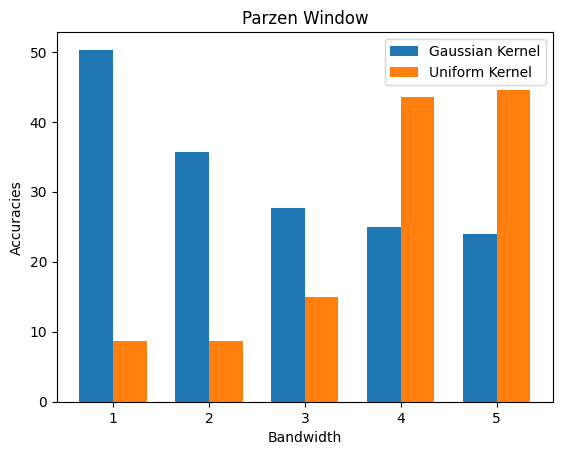

In [85]:
# Extracting keys and values from both dictionaries
labels = list(accuracies_gaussian.keys())
values1 = list(accuracies_gaussian.values())
values2 = list(accuracies_uniform.values())

# Setting the width of the bars
bar_width = 0.35
x = np.arange(len(labels))

# Creating bar graph
plt.bar(x - bar_width/2, values1, bar_width, label='Gaussian Kernel')
plt.bar(x + bar_width/2, values2, bar_width, label='Uniform Kernel')

# Adding labels and title
plt.xlabel('Bandwidth')
plt.ylabel('Accuracies')
plt.title('Parzen Window')

# Adding x-axis labels
plt.xticks(x, labels)

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


### ANALYSIS:

1. for h == 1, gaussian kernel performs well

2. for h == 5, uniform kernel performs well

3. further increasing value of h, decreases the performence



---



---



#EM ALGORITHM

###Methods

Hyper Parameter: No. of Gaussian Mixtures (n_components)

Step 1: Seperate X_train for each class.Lets work for a class C

Step 2: Assume some initial parameters(pi,mu,var) for each gaussian.

Step 3: Perform E step for finding gamma

Step 4: Perform M step: Update parameters

Step 5: Check if parameters converged or not.

Step 6: Store this set of parameters.

Step 6: Repeat for all classes and store them also.

In [37]:
class GMMClassifier:
    def __init__(self, n_classes, n_components, max_iter=100, tol=1e-4):
        self.n_classes = n_classes
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.gmms = [None] * n_classes

    def fit(self, X_train, y_train):
        likelihoods = []
        for c in range(self.n_classes):
            ll = []
            X_c = X_train[y_train == c]
            gmm = self.initialize_gmm(X_c)
            # gmm[c] stores pi,mu,co_var of all gaussian mixtures
            gmm, likelihood = self.em_algorithm(X_c, gmm)
            self.gmms[c] = gmm
            if(c == 0):
              likelihoods = likelihood
        return likelihoods

    def predict(self, X_test):
        probabilities = np.zeros((X_test.shape[0], self.n_classes))
        for c, gmm in enumerate(self.gmms):
            probabilities[:, c] = np.sum([pi * self.multivariate_normal_pdf(X_test, mean=mu, cov=cov)
                                           for pi, mu, cov in zip(gmm['pi'], gmm['mu'], gmm['cov'])], axis=0)
        return np.argmax(probabilities, axis=1)

    def initialize_gmm(self, X):
        n_features = X.shape[1]
        pi = np.ones(self.n_components) / self.n_components
        mu = X[np.random.choice(X.shape[0], self.n_components, replace=False)]
        cov = [np.eye(n_features) for _ in range(self.n_components)]
        return {'pi': pi, 'mu': mu, 'cov': cov}

    def em_algorithm(self, X, gmm):
        likelihoods = []
        for _ in range(self.max_iter):
            # E step
            gamma = self.compute_gamma(X, gmm)
            # M step
            new_gmm = self.update_parameters(X, gamma)
            # Compute log-likelihood
            likelihood = self.compute_log_likelihood(X, new_gmm)
            likelihoods.append(likelihood)
            # Convergence checking
            if self.converge_check(gmm, new_gmm):
                break
            # Parameter update
            gmm = new_gmm
        return gmm, likelihoods

    def compute_gamma(self, X, gmm):
        # finding all gammas for each gaussian using X(classwise training data)
        likelihoods = np.array([self.multivariate_normal_pdf(X, mean=gmm['mu'][i], cov=gmm['cov'][i]) * gmm['pi'][i]
                                 for i in range(self.n_components)]).T
        return likelihoods / np.sum(likelihoods, axis=1, keepdims=True)

    def update_parameters(self, X, gamma):
        # denominator --> sum of all gammas
        N_c = np.sum(gamma, axis=0)
        # Estimation of Mixture coefficient.
        # pi = N_c/N
        pi_new = N_c / X.shape[0]
        # Estimation of Mean.
        # 1/N_c(sum of gamma * x)
        mu_new = np.dot(gamma.T, X) / N_c[:, None]
        # Estimation of covariance
        cov_new = [(np.dot((X - mu).T, (X - mu) * gamma[:, i][:, np.newaxis]) / N_c[i] + 1e-6 * np.eye(X.shape[1]))
                  for i, mu in enumerate(mu_new)]
        return {'pi': pi_new, 'mu': mu_new, 'cov': cov_new}


    def compute_log_likelihood(self, X, gmm):
        likelihoods = np.array([self.multivariate_normal_pdf(X, mean=gmm['mu'][i], cov=gmm['cov'][i]) * gmm['pi'][i]
                                 for i in range(self.n_components)]).T
        return np.sum(np.log(np.sum(likelihoods, axis=1)))

    def converge_check(self, gmm1, gmm2):
        # if all parameters are close enough, return True
        return np.allclose(gmm1['pi'], gmm2['pi'], rtol=self.tol) \
               and np.allclose(gmm1['mu'], gmm2['mu'], rtol=self.tol) \
               and np.allclose(gmm1['cov'], gmm2['cov'], rtol=self.tol)

    def multivariate_normal_pdf(self, X, mean, cov):
        n_features = X.shape[1]
        det_cov = np.linalg.det(cov)
        norm_const = 1.0 / ((2 * np.pi) ** (n_features / 2) * det_cov ** (1.0 / 2))
        inv_cov = np.linalg.inv(cov)
        diff = X - mean
        exponent = -0.5 * np.sum(np.dot(diff, inv_cov) * diff, axis=1)
        return norm_const * np.exp(exponent)



In [38]:
accuracies = {}
likelihoods = []
n_classes = np.unique(y_train).shape[0]
def gmm(components):
  gmm_classifier = GMMClassifier(n_classes,components)
  likelihoods.append(gmm_classifier.fit(X_train, y_train))

  # Predict
  y_pred = gmm_classifier.predict(X_test)

  print(f"For n_components == {c} --->")
  print("")
  # Print training accuracies
  accuracies[components] = accuracy(y_pred,y_test)
  print("Testing Accuracy (GMM):", accuracies[components])


  #confusion matrix
  print("CONFUSION MATRIX GMM: ")
  print(confusion_matrix(y_pred,y_test,int(n_classes)))

  # f1 score GMM
  print("GMM f1 scores classwise")
  print(f1_score(y_pred,y_test,int(n_classes)))
  print("")

components = [6,7,8,9,10,11]
for c in components:
  gmm(c)

For n_components == 6 --->

Testing Accuracy (GMM): 79.82857142857142
CONFUSION MATRIX GMM: 
[[ 967.   27.   24.   40.   42.   47.   52.   39.   39.   44.]
 [  32. 1193.   22.   31.   51.   27.   23.   35.   17.   32.]
 [  28.   18. 1194.   33.   17.   19.   24.    9.   18.   18.]
 [  43.   31.   23. 1137.   37.   26.   27.   23.   33.   31.]
 [  41.   43.   32.   40. 1089.   33.   49.   31.   28.   39.]
 [  45.   26.   29.   27.   27. 1096.   20.   20.   18.   41.]
 [  46.   38.   27.   38.   56.   34. 1076.   33.   27.   62.]
 [  23.   33.   13.   25.   29.   22.   23. 1156.   27.   38.]
 [  38.   25.   26.   31.   37.   19.   22.   25. 1140.   31.]
 [  57.   26.   14.   37.   39.   26.   44.   39.   23. 1128.]]
GMM f1 scores classwise
[0.73229837 0.81628464 0.85837527 0.79789474 0.76447876 0.81245367
 0.76939578 0.82600929 0.82489146 0.77873662]

For n_components == 7 --->

Testing Accuracy (GMM): 80.43571428571428
CONFUSION MATRIX GMM: 
[[ 951.   36.   26.   44.   42.   52.   43.  

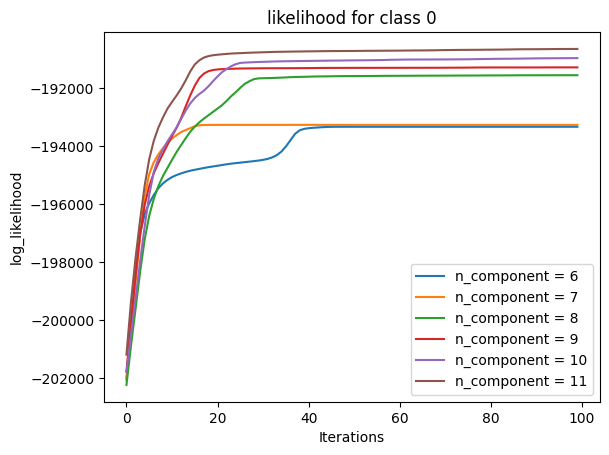

In [41]:
components = [6,7,8,9,10,11]
for i,l in enumerate(likelihoods):
  list1 = l
  # Plotting the first list
  plt.plot(list1, label=f'n_component = {components[i]}')


# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('log_likelihood')
plt.title('likelihood for class 0')

# Adding legend
plt.legend()

# Display the plot
plt.show()

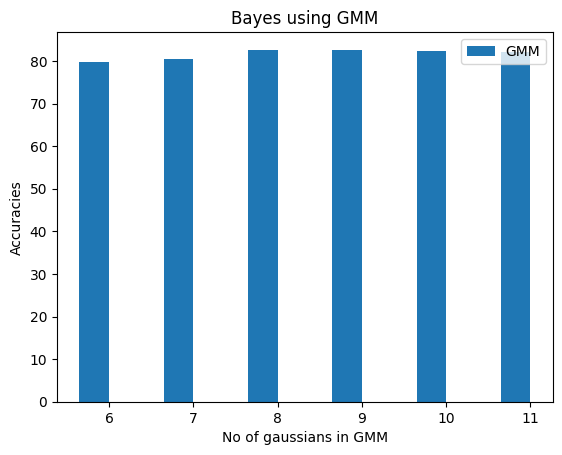

In [40]:
# Extracting keys and values from both dictionaries
labels = list(accuracies.keys())
values1 = list(accuracies.values())

# Setting the width of the bars
bar_width = 0.35
x = np.arange(len(labels))

# Creating bar graph
plt.bar(x - bar_width/2, values1, bar_width, label='GMM')

# Adding labels and title
plt.xlabel('No of gaussians in GMM')
plt.ylabel('Accuracies')
plt.title('Bayes using GMM')

# Adding x-axis labels
plt.xticks(x, labels)

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


###ANALYSIS:

1. Number of Components(No. of Gaussians) == 8 or 9 or 10 gives the best result and increasing further is not improving the performence significantly.
